In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

# Humboldt

## Read raw data (ARGO)

In [2]:
%cd "E:/Validation_EBUS_DavidBU/Argo data download/Humboldt/Core/"

E:\Validation_EBUS_DavidBU\Argo data download\Humboldt\Core


In [3]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(9995740, 14)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Ciclo,Id,Year,Month,Day
0,2003-12-05 13:47:36,-84.805,-20.431,7.5,7.5,19.789000,19.789000,35.206001,35.237999,2,3900174,2003,12,5
1,2003-12-05 13:47:36,-84.805,-20.431,17.5,17.5,19.788000,19.788000,35.205002,35.237000,2,3900174,2003,12,5
2,2003-12-05 13:47:36,-84.805,-20.431,27.5,27.5,19.783001,19.783001,35.202000,35.234001,2,3900174,2003,12,5
3,2003-12-05 13:47:36,-84.805,-20.431,37.5,37.5,19.523001,19.523001,35.192001,35.223999,2,3900174,2003,12,5
4,2003-12-05 13:47:36,-84.805,-20.431,47.5,47.5,18.490999,18.490999,35.085999,35.118000,2,3900174,2003,12,5


In [4]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(9995740, 14)
(20078, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2003-12-05 13:47:36,-84.805000,-20.431000,2,12
43,2003-12-01 13:33:45,-77.944000,-20.054001,1,12
87,2003-12-11 14:45:17,-78.084999,-20.132000,2,12
131,2003-12-21 14:17:48,-78.334999,-20.164000,3,12
174,2003-12-01 13:35:40,-81.128998,-20.118999,1,12


In [5]:
# Count by month
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 253
Mes:  2 242
Mes:  3 256
Mes:  4 254
Mes:  5 252
Mes:  6 246
Mes:  7 250
Mes:  8 267
Mes:  9 298
Mes:  10 308
Mes:  11 308
Mes:  12 283


In [6]:
# Count profiles by month
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-85,-70+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-45,-15+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [7]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [8]:
lista_conteos[0].shape

(30, 15)

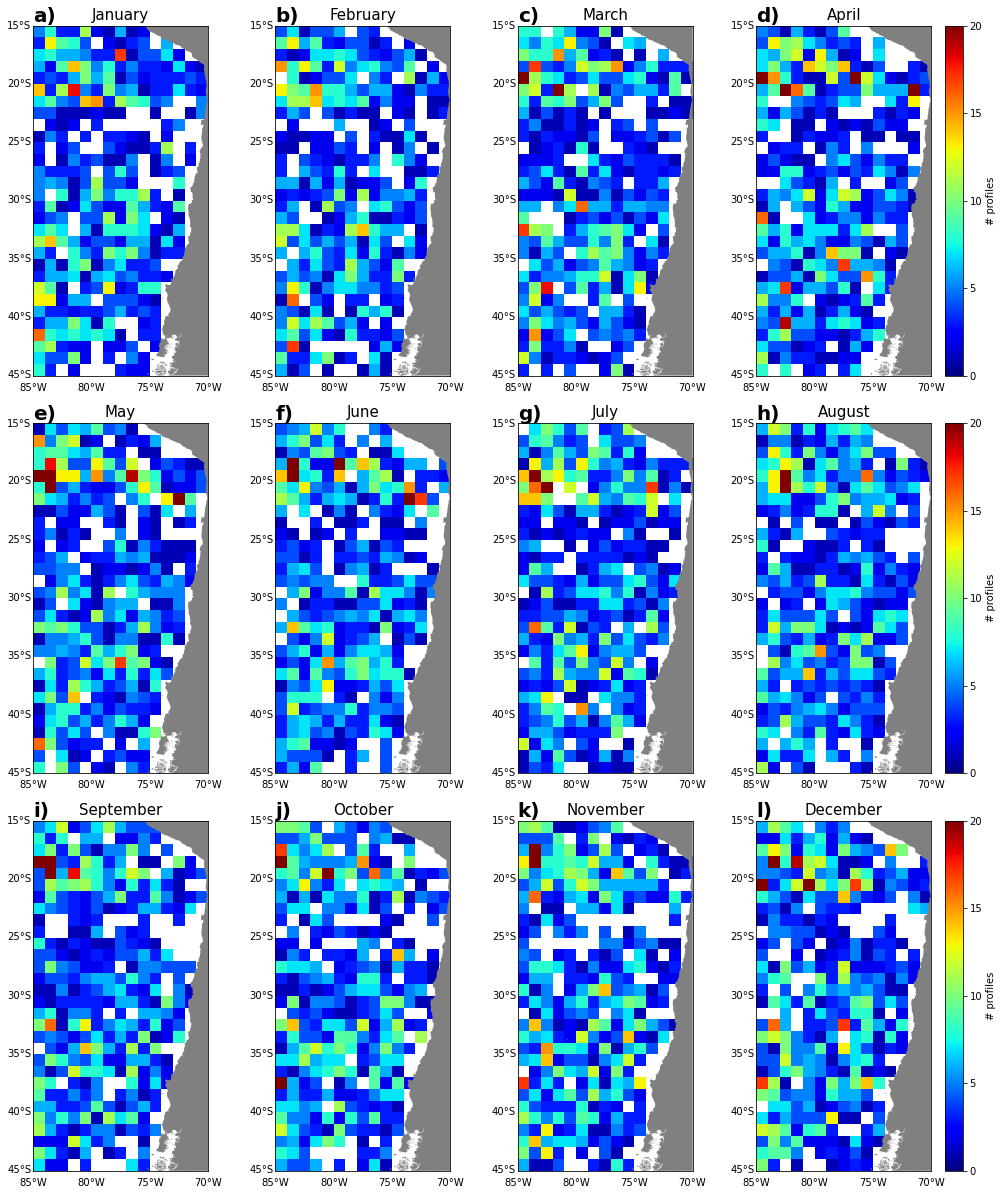

In [9]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  cs=m.pcolormesh(x1, y1, z,cmap='jet',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Read reanalysis data

In [11]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Humboldt/"
reanal=xr.open_dataset(ruta+'GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

<xarray.Dataset>
Dimensions:  (lon: 61, lat: 217, month: 12)
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -54.0 -53.75 -53.5 -53.25 ... -0.75 -0.5 -0.25 0.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.14 34.14 34.14 34.14 ... nan nan nan

**Filter 0 -100 dbar** (ARGO)

<AxesSubplot:>

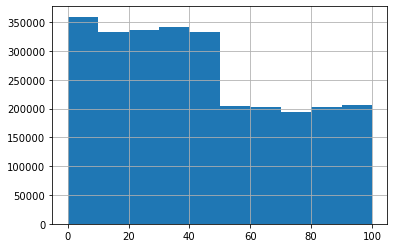

In [12]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [13]:
# Group and take the mean to avoid duplicates
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (84802, 6)
Mes:  2 - Dimension: (83012, 6)
Mes:  3 - Dimension: (88687, 6)
Mes:  4 - Dimension: (110158, 6)
Mes:  5 - Dimension: (127543, 6)
Mes:  6 - Dimension: (124662, 6)
Mes:  7 - Dimension: (122064, 6)
Mes:  8 - Dimension: (116406, 6)
Mes:  9 - Dimension: (116353, 6)
Mes:  10 - Dimension: (121817, 6)
Mes:  11 - Dimension: (131148, 6)
Mes:  12 - Dimension: (118650, 6)


## Example for one month (Vertical interpolation Akima)

------------------------------------
Id : 3900224
Ciclo 144 ......................... Check
Ciclo 146 ......................... Check


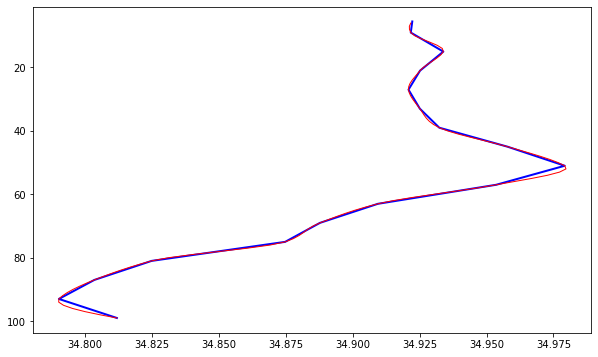

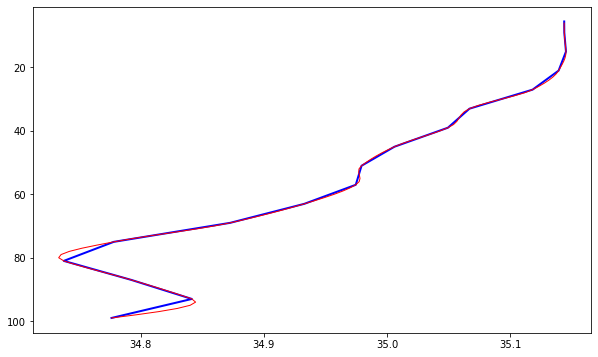

In [14]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos[0:2]:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Function to generalize

In [15]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validation-January 

In [16]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero.head()

Intento fallido en Id: 3901068 Ciclo 104
Intento fallido en Id: 3901068 Ciclo 103
Intento fallido en Id: 3901068 Ciclo 102
Intento fallido en Id: 3900184 Ciclo 6
Intento fallido en Id: 3900496 Ciclo 10
Intento fallido en Id: 3900496 Ciclo 9
Intento fallido en Id: 3900496 Ciclo 8
Intento fallido en Id: 3900495 Ciclo 10
Intento fallido en Id: 3900495 Ciclo 8
Intento fallido en Id: 3900495 Ciclo 9
Intento fallido en Id: 4900512 Ciclo 21
Intento fallido en Id: 4900512 Ciclo 20
Intento fallido en Id: 4900512 Ciclo 19
Intento fallido en Id: 4900513 Ciclo 21
Tamaño de los dataframes generados : 1542
(155742, 4)


,Lon,Lat,Presion_interp,S_interp
0,-84.998,-30.865,0,34.980899
1,-84.998,-30.865,1,34.979343
2,-84.998,-30.865,2,34.977786
3,-84.998,-30.865,3,34.976229
4,-84.998,-30.865,4,34.974673


In [17]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 15)


(30, 15)


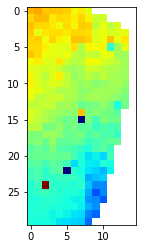

In [19]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet',vmin=32, vmax=37)

In [20]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


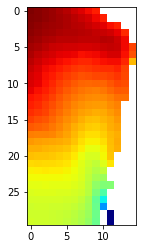

In [21]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

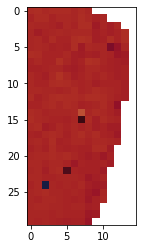

In [22]:
# Difference model and ARGO
import cmocean
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-February

In [23]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero.head()

Intento fallido en Id: 3900491 Ciclo 14
Intento fallido en Id: 3901068 Ciclo 106
Intento fallido en Id: 3900185 Ciclo 10
Intento fallido en Id: 3900184 Ciclo 10
Intento fallido en Id: 3900530 Ciclo 0
Intento fallido en Id: 3900496 Ciclo 11
Intento fallido en Id: 3900496 Ciclo 12
Intento fallido en Id: 3900496 Ciclo 13
Intento fallido en Id: 4900512 Ciclo 24
Intento fallido en Id: 4900512 Ciclo 22
Intento fallido en Id: 4900512 Ciclo 23
Intento fallido en Id: 3900495 Ciclo 11
Intento fallido en Id: 3900495 Ciclo 12
Intento fallido en Id: 3900495 Ciclo 13
Intento fallido en Id: 4900513 Ciclo 24
Intento fallido en Id: 4900513 Ciclo 23
Intento fallido en Id: 4900513 Ciclo 22
Tamaño de los dataframes generados : 1469
(148369, 4)


,Lon,Lat,Presion_interp,S_interp
0,-84.98703,-18.00377,0,35.470583
1,-84.98703,-18.00377,1,35.469409
2,-84.98703,-18.00377,2,35.471001
3,-84.98703,-18.00377,3,35.470967
4,-84.98703,-18.00377,4,35.471324


In [24]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 15)
CPU times: total: 1.52 s
Wall time: 2.2 s


(30, 15)


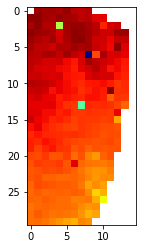

In [25]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [26]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


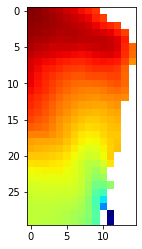

In [27]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

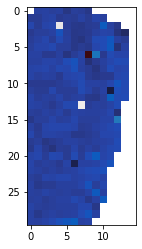

In [28]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-March

In [29]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo.head()

Intento fallido en Id: 3900526 Ciclo 0
Intento fallido en Id: 3901068 Ciclo 115
Intento fallido en Id: 3901068 Ciclo 114
Intento fallido en Id: 3900491 Ciclo 16
Intento fallido en Id: 3900491 Ciclo 15
Intento fallido en Id: 3900491 Ciclo 17
Intento fallido en Id: 3900529 Ciclo 0
Intento fallido en Id: 3900496 Ciclo 14
Intento fallido en Id: 3900496 Ciclo 15
Intento fallido en Id: 3900496 Ciclo 16
Intento fallido en Id: 4900512 Ciclo 25
Intento fallido en Id: 4900512 Ciclo 26
Intento fallido en Id: 4900512 Ciclo 27
Intento fallido en Id: 3900495 Ciclo 14
Intento fallido en Id: 3900495 Ciclo 15
Intento fallido en Id: 3900495 Ciclo 16
Intento fallido en Id: 4900513 Ciclo 27
Intento fallido en Id: 4900513 Ciclo 26
Intento fallido en Id: 4900513 Ciclo 25
Tamaño de los dataframes generados : 1601
(161701, 4)


,Lon,Lat,Presion_interp,S_interp
0,-84.995,-32.694,0,34.648840
1,-84.995,-32.694,1,34.645266
2,-84.995,-32.694,2,34.641691
3,-84.995,-32.694,3,34.638117
4,-84.995,-32.694,4,34.634542


In [30]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 15)
CPU times: total: 1.72 s
Wall time: 2.68 s


(30, 15)


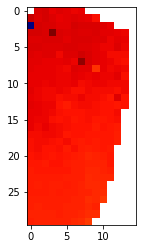

In [31]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [32]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


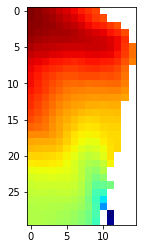

In [33]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

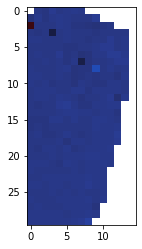

In [34]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-April

In [35]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril.head()

Intento fallido en Id: 3900549 Ciclo 8
Intento fallido en Id: 3900549 Ciclo 7
Intento fallido en Id: 3900491 Ciclo 18
Intento fallido en Id: 3900491 Ciclo 19
Intento fallido en Id: 3900491 Ciclo 20
Intento fallido en Id: 3900496 Ciclo 17
Intento fallido en Id: 3900496 Ciclo 18
Intento fallido en Id: 3900496 Ciclo 19
Intento fallido en Id: 4900512 Ciclo 28
Intento fallido en Id: 4900512 Ciclo 29
Intento fallido en Id: 4900512 Ciclo 30
Intento fallido en Id: 3900495 Ciclo 19
Intento fallido en Id: 3900495 Ciclo 17
Intento fallido en Id: 3900495 Ciclo 18
Intento fallido en Id: 4900513 Ciclo 30
Intento fallido en Id: 4900513 Ciclo 29
Intento fallido en Id: 4900513 Ciclo 28
Tamaño de los dataframes generados : 1650
(166650, 4)


,Lon,Lat,Presion_interp,S_interp
0,-85.0,-42.673,0,33.874050
1,-85.0,-42.673,1,33.874425
2,-85.0,-42.673,2,33.874799
3,-85.0,-42.673,3,33.875174
4,-85.0,-42.673,4,33.875548


In [36]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 15)
CPU times: total: 2.12 s
Wall time: 2.93 s


(30, 15)


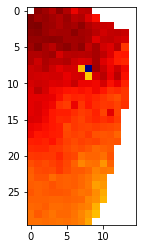

In [37]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [38]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


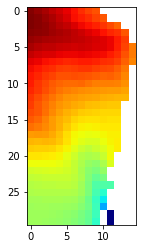

In [39]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

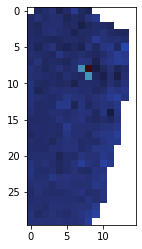

In [40]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-May

In [41]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo.head()

Intento fallido en Id: 3900549 Ciclo 12
Intento fallido en Id: 3900549 Ciclo 10
Intento fallido en Id: 3900549 Ciclo 11
Intento fallido en Id: 3900491 Ciclo 21
Intento fallido en Id: 3900496 Ciclo 20
Intento fallido en Id: 3900496 Ciclo 21
Intento fallido en Id: 3900496 Ciclo 22
Intento fallido en Id: 4900512 Ciclo 31
Intento fallido en Id: 4900512 Ciclo 33
Intento fallido en Id: 4900512 Ciclo 32
Intento fallido en Id: 3900495 Ciclo 20
Intento fallido en Id: 3900495 Ciclo 21
Intento fallido en Id: 3900495 Ciclo 22
Intento fallido en Id: 4900513 Ciclo 31
Intento fallido en Id: 4900513 Ciclo 32
Intento fallido en Id: 4900513 Ciclo 33
Tamaño de los dataframes generados : 1698
(171498, 4)


,Lon,Lat,Presion_interp,S_interp
0,-84.99817,-21.80639,0,35.516136
1,-84.99817,-21.80639,1,35.331001
2,-84.99817,-21.80639,2,35.331001
3,-84.99817,-21.80639,3,35.330978
4,-84.99817,-21.80639,4,35.330996


In [42]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 15)
CPU times: total: 1.86 s
Wall time: 3.58 s


(30, 15)


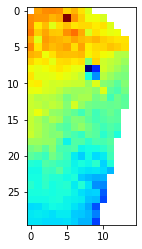

In [43]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [44]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


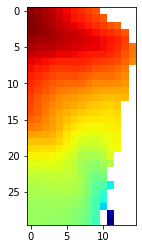

In [45]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

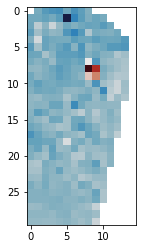

In [46]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-June

In [47]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio.head()

Intento fallido en Id: 3900549 Ciclo 15
Intento fallido en Id: 3900549 Ciclo 14
Intento fallido en Id: 3900549 Ciclo 13
Intento fallido en Id: 3900548 Ciclo 13
Intento fallido en Id: 3900548 Ciclo 14
Intento fallido en Id: 3900524 Ciclo 74
Intento fallido en Id: 3900496 Ciclo 25
Intento fallido en Id: 3900496 Ciclo 24
Intento fallido en Id: 3900496 Ciclo 23
Intento fallido en Id: 4900512 Ciclo 34
Intento fallido en Id: 4900512 Ciclo 35
Intento fallido en Id: 4900512 Ciclo 36
Intento fallido en Id: 3901066 Ciclo 145
Intento fallido en Id: 3900520 Ciclo 0
Intento fallido en Id: 3900495 Ciclo 23
Intento fallido en Id: 3900495 Ciclo 24
Intento fallido en Id: 3900495 Ciclo 25
Intento fallido en Id: 4900513 Ciclo 34
Intento fallido en Id: 4900513 Ciclo 35
Intento fallido en Id: 4900513 Ciclo 36
Intento fallido en Id: 3901068 Ciclo 31
Intento fallido en Id: 3901068 Ciclo 30
Intento fallido en Id: 3901068 Ciclo 29
Intento fallido en Id: 3901068 Ciclo 26
Tamaño de los dataframes generados : 163

,Lon,Lat,Presion_interp,S_interp
0,-84.999,-28.125,0,35.159787
1,-84.999,-28.125,1,35.159933
2,-84.999,-28.125,2,35.160078
3,-84.999,-28.125,3,35.160224
4,-84.999,-28.125,4,35.160369


In [48]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 15)
CPU times: total: 2.08 s
Wall time: 2.76 s


(30, 15)


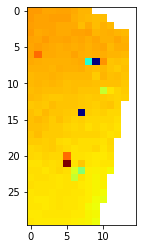

In [49]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [50]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


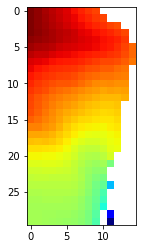

In [51]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

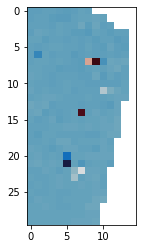

In [52]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-July

In [53]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio.head()

Intento fallido en Id: 3900496 Ciclo 27
Intento fallido en Id: 3900496 Ciclo 26
Intento fallido en Id: 3900496 Ciclo 28
Intento fallido en Id: 3900491 Ciclo 29
Intento fallido en Id: 3900491 Ciclo 28
Intento fallido en Id: 3900548 Ciclo 16
Intento fallido en Id: 3900548 Ciclo 15
Intento fallido en Id: 3900548 Ciclo 17
Intento fallido en Id: 3900524 Ciclo 79
Intento fallido en Id: 4900512 Ciclo 39
Intento fallido en Id: 4900512 Ciclo 38
Intento fallido en Id: 4900512 Ciclo 37
Intento fallido en Id: 3900495 Ciclo 28
Intento fallido en Id: 3900495 Ciclo 26
Intento fallido en Id: 3900495 Ciclo 27
Intento fallido en Id: 4900513 Ciclo 39
Intento fallido en Id: 4900513 Ciclo 38
Intento fallido en Id: 4900513 Ciclo 37
Tamaño de los dataframes generados : 1662
(167862, 4)


,Lon,Lat,Presion_interp,S_interp
0,-84.98846,-23.77449,0,35.214527
1,-84.98846,-23.77449,1,35.230125
2,-84.98846,-23.77449,2,35.230041
3,-84.98846,-23.77449,3,35.229003
4,-84.98846,-23.77449,4,35.229000


In [54]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 15)
CPU times: total: 1.83 s
Wall time: 2.05 s


(30, 15)


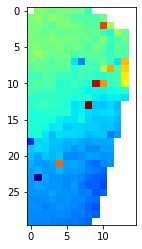

In [55]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [56]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


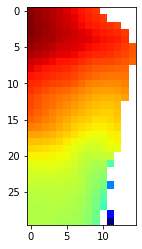

In [57]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

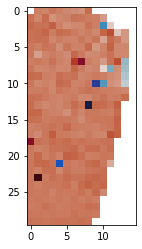

In [58]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-August

In [59]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto.head()

Intento fallido en Id: 3900496 Ciclo 31
Intento fallido en Id: 3900496 Ciclo 30
Intento fallido en Id: 3900496 Ciclo 29
Intento fallido en Id: 3900491 Ciclo 30
Intento fallido en Id: 3900491 Ciclo 32
Intento fallido en Id: 3900491 Ciclo 31
Intento fallido en Id: 3900549 Ciclo 20
Intento fallido en Id: 3900549 Ciclo 19
Intento fallido en Id: 3900549 Ciclo 18
Intento fallido en Id: 3900548 Ciclo 18
Intento fallido en Id: 3900548 Ciclo 19
Intento fallido en Id: 3900548 Ciclo 20
Intento fallido en Id: 4900512 Ciclo 40
Intento fallido en Id: 4900512 Ciclo 41
Intento fallido en Id: 4900512 Ciclo 42
Intento fallido en Id: 3901066 Ciclo 53
Intento fallido en Id: 3901066 Ciclo 49
Intento fallido en Id: 3901068 Ciclo 53
Intento fallido en Id: 3901068 Ciclo 52
Intento fallido en Id: 3900495 Ciclo 29
Intento fallido en Id: 3900495 Ciclo 30
Intento fallido en Id: 3900495 Ciclo 31
Intento fallido en Id: 4900513 Ciclo 42
Intento fallido en Id: 4900513 Ciclo 41
Intento fallido en Id: 4900513 Ciclo 40


,Lon,Lat,Presion_interp,S_interp
0,-84.995003,-25.129,0,35.026791
1,-84.995003,-25.129,1,35.023307
2,-84.995003,-25.129,2,35.019823
3,-84.995003,-25.129,3,35.016339
4,-84.995003,-25.129,4,35.012855


In [60]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 15)
CPU times: total: 2.22 s
Wall time: 2.63 s


(30, 15)


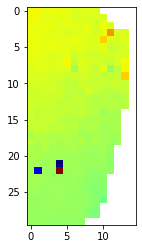

In [61]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [62]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


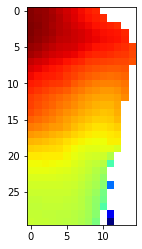

In [63]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

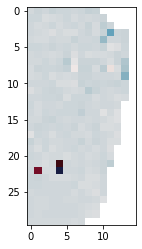

In [64]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-September

In [65]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre.head()

Intento fallido en Id: 3900563 Ciclo 23
Intento fallido en Id: 3900549 Ciclo 21
Intento fallido en Id: 3900549 Ciclo 22
Intento fallido en Id: 3900549 Ciclo 23
Intento fallido en Id: 3900491 Ciclo 35
Intento fallido en Id: 3900491 Ciclo 34
Intento fallido en Id: 3900491 Ciclo 33
Intento fallido en Id: 3900548 Ciclo 23
Intento fallido en Id: 3900548 Ciclo 22
Intento fallido en Id: 3900548 Ciclo 21
Intento fallido en Id: 3900528 Ciclo 0
Intento fallido en Id: 4900512 Ciclo 45
Intento fallido en Id: 4900512 Ciclo 44
Intento fallido en Id: 4900512 Ciclo 43
Intento fallido en Id: 3900496 Ciclo 34
Intento fallido en Id: 3900496 Ciclo 33
Intento fallido en Id: 3900496 Ciclo 32
Intento fallido en Id: 3901068 Ciclo 63
Intento fallido en Id: 3901068 Ciclo 60
Intento fallido en Id: 3901068 Ciclo 54
Intento fallido en Id: 4900513 Ciclo 43
Intento fallido en Id: 4900513 Ciclo 45
Intento fallido en Id: 4900513 Ciclo 44
Intento fallido en Id: 3900495 Ciclo 34
Intento fallido en Id: 3900495 Ciclo 32
I

,Lon,Lat,Presion_interp,S_interp
0,-84.997,-43.035,0,33.934310
1,-84.997,-43.035,1,33.934364
2,-84.997,-43.035,2,33.934418
3,-84.997,-43.035,3,33.934472
4,-84.997,-43.035,4,33.934526


In [66]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 15)
CPU times: total: 1.81 s
Wall time: 2.33 s


(30, 15)


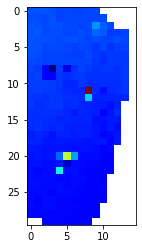

In [67]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [68]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


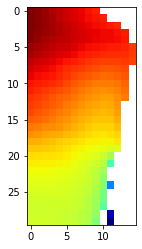

In [69]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

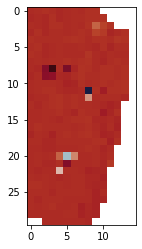

In [70]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-October

In [71]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre.head()

Intento fallido en Id: 3900491 Ciclo 36
Intento fallido en Id: 3900594 Ciclo 0
Intento fallido en Id: 3900563 Ciclo 24
Intento fallido en Id: 3900563 Ciclo 25
Intento fallido en Id: 3900563 Ciclo 26
Intento fallido en Id: 4900797 Ciclo 0
Intento fallido en Id: 3900549 Ciclo 26
Intento fallido en Id: 3900549 Ciclo 25
Intento fallido en Id: 3900549 Ciclo 24
Intento fallido en Id: 3901036 Ciclo 55
Intento fallido en Id: 4900798 Ciclo 0
Intento fallido en Id: 3900519 Ciclo 0
Intento fallido en Id: 4900796 Ciclo 1
Intento fallido en Id: 4900796 Ciclo 0
Intento fallido en Id: 3900548 Ciclo 25
Intento fallido en Id: 3900548 Ciclo 26
Intento fallido en Id: 3900548 Ciclo 24
Intento fallido en Id: 4900512 Ciclo 46
Intento fallido en Id: 4900512 Ciclo 47
Intento fallido en Id: 4900512 Ciclo 48
Intento fallido en Id: 3900496 Ciclo 37
Intento fallido en Id: 3900496 Ciclo 36
Intento fallido en Id: 3900496 Ciclo 35
Intento fallido en Id: 3901068 Ciclo 72
Intento fallido en Id: 3901068 Ciclo 70
Intent

,Lon,Lat,Presion_interp,S_interp
0,-84.996002,-15.985,0,35.435524
1,-84.996002,-15.985,1,35.435516
2,-84.996002,-15.985,2,35.435509
3,-84.996002,-15.985,3,35.435502
4,-84.996002,-15.985,4,35.435494


In [72]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 15)
CPU times: total: 1.91 s
Wall time: 2.47 s


(30, 15)


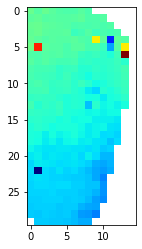

In [73]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [74]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


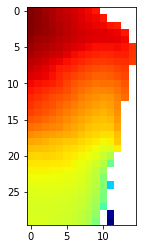

In [75]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

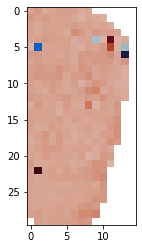

In [76]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-November

In [77]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre.head()

Intento fallido en Id: 3900563 Ciclo 29
Intento fallido en Id: 3900563 Ciclo 28
Intento fallido en Id: 3900563 Ciclo 27
Intento fallido en Id: 3900549 Ciclo 27
Intento fallido en Id: 4900798 Ciclo 3
Intento fallido en Id: 4900798 Ciclo 2
Intento fallido en Id: 4900798 Ciclo 1
Intento fallido en Id: 3900790 Ciclo 71
Intento fallido en Id: 4900796 Ciclo 4
Intento fallido en Id: 4900796 Ciclo 3
Intento fallido en Id: 4900796 Ciclo 2
Intento fallido en Id: 3900548 Ciclo 28
Intento fallido en Id: 3900548 Ciclo 27
Intento fallido en Id: 3901068 Ciclo 83
Intento fallido en Id: 3901068 Ciclo 74
Intento fallido en Id: 3900496 Ciclo 40
Intento fallido en Id: 3900496 Ciclo 39
Intento fallido en Id: 3900496 Ciclo 38
Intento fallido en Id: 3900495 Ciclo 40
Intento fallido en Id: 3900495 Ciclo 39
Intento fallido en Id: 3900495 Ciclo 38
Intento fallido en Id: 4900512 Ciclo 49
Intento fallido en Id: 4900512 Ciclo 51
Intento fallido en Id: 4900512 Ciclo 50
Intento fallido en Id: 4900513 Ciclo 49
Intent

,Lon,Lat,Presion_interp,S_interp
0,-84.99869,-29.50214,0,35.034212
1,-84.99869,-29.50214,1,35.011564
2,-84.99869,-29.50214,2,35.012960
3,-84.99869,-29.50214,3,35.013927
4,-84.99869,-29.50214,4,35.026001


In [78]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 15)
CPU times: total: 1.84 s
Wall time: 2.14 s


(30, 15)


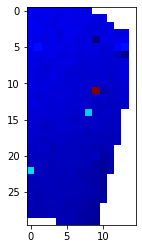

In [79]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [80]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


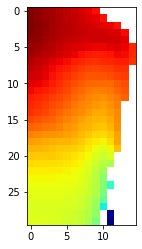

In [81]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

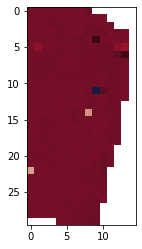

In [82]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-December

In [83]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre.head()

Intento fallido en Id: 3900563 Ciclo 32
Intento fallido en Id: 4900798 Ciclo 6
Intento fallido en Id: 4900798 Ciclo 5
Intento fallido en Id: 4900798 Ciclo 4
Intento fallido en Id: 4900796 Ciclo 6
Intento fallido en Id: 4900796 Ciclo 7
Intento fallido en Id: 4900796 Ciclo 5
Intento fallido en Id: 3901068 Ciclo 91
Intento fallido en Id: 3901068 Ciclo 89
Intento fallido en Id: 3901068 Ciclo 88
Intento fallido en Id: 3901068 Ciclo 87
Intento fallido en Id: 3901068 Ciclo 85
Intento fallido en Id: 3900495 Ciclo 43
Intento fallido en Id: 3900495 Ciclo 42
Intento fallido en Id: 3900495 Ciclo 41
Intento fallido en Id: 3900496 Ciclo 43
Intento fallido en Id: 3900496 Ciclo 42
Intento fallido en Id: 3900496 Ciclo 41
Intento fallido en Id: 4900512 Ciclo 54
Intento fallido en Id: 4900512 Ciclo 52
Intento fallido en Id: 4900512 Ciclo 53
Intento fallido en Id: 3901046 Ciclo 181
Intento fallido en Id: 4900513 Ciclo 52
Intento fallido en Id: 4900513 Ciclo 53
Intento fallido en Id: 4900513 Ciclo 54
Tamañ

,Lon,Lat,Presion_interp,S_interp
0,-84.987,-44.156,0,33.937954
1,-84.987,-44.156,1,33.937968
2,-84.987,-44.156,2,33.937982
3,-84.987,-44.156,3,33.937995
4,-84.987,-44.156,4,33.938009


In [84]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-85+0.5,-70+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-45+0.5, -15+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 15)
CPU times: total: 2.03 s
Wall time: 2.29 s


(30, 15)


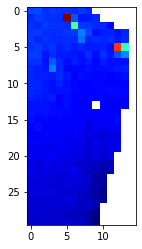

In [85]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [86]:
x1= np.arange(-85+0.5, -70+0.5,1)
y1= list(np.arange(-45+0.5, -15+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 15)


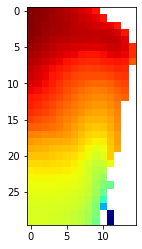

In [87]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

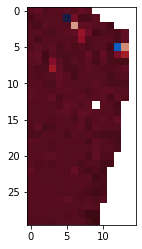

In [88]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Taylor diagram

In [89]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [90]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.581728,0.574440,0.819258,January
1,0.725698,0.712159,0.712286,February
2,0.299027,0.245057,0.972448,March
3,0.716121,0.758291,0.653557,April
4,0.841668,0.918952,0.402338,May
5,0.370344,0.378338,0.927283,June
6,0.709328,0.765566,0.650941,July
7,0.577101,0.627180,0.781143,August
8,0.428993,0.407722,0.914330,September
9,0.669048,0.743462,0.673355,October


In [91]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Humboldt/"
dfr.to_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Humboldt.csv',index=False)

In [92]:
from taylorDiagram_mod import TaylorDiagram as TaDiM
dfr=pd.read_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Humboldt.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

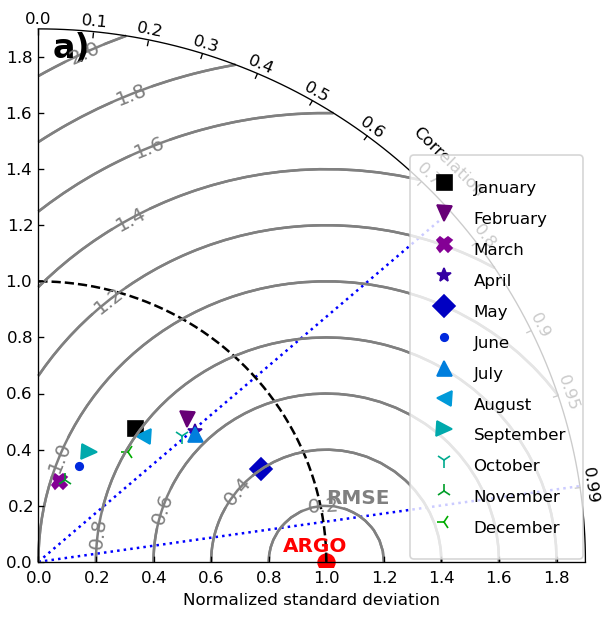

In [94]:
import numpy as NP
#figID_Taylor = plt.figure(num=25, dpi=240)
#figID_Taylor.set_size_inches(6., 6.)
figID_Taylor = plt.figure(num=20, dpi=120)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower right', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'a)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)
plt.xticks(fontsize=25)

## Spatial comparison

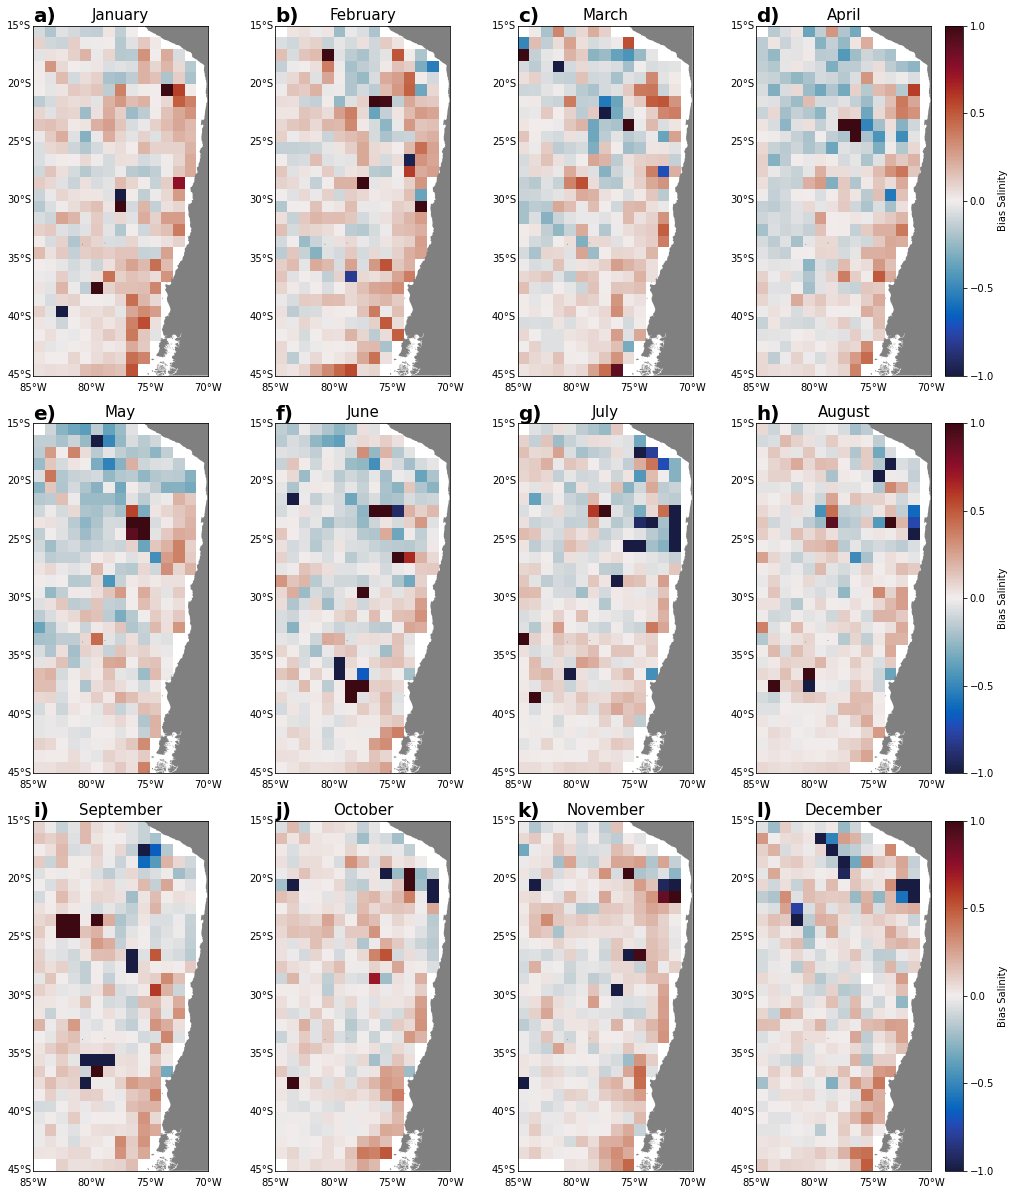

In [95]:
import string
x1= np.arange(-85+0.5, -70+0.5,1);y1= list(np.arange(-45+0.5,-15+0.5,1));y1=y1[::-1];y1= np.array(y1);
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# California

## Read raw data (ARGO)

In [96]:
%cd "E:/Validation_EBUS_DavidBU/Argo data download/California/Core/"

E:\Validation_EBUS_DavidBU\Argo data download\California\Core


In [97]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(5571023, 14)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Ciclo,Id,Year,Month,Day
0,2002-09-07 08:00:50,-125.904999,32.081001,4.400000,3.400000,18.731001,18.731001,32.916000,32.916000,1,4900096,2002,9,7
1,2002-09-07 08:00:50,-125.904999,32.081001,9.300000,8.300000,18.605000,18.605000,32.929001,32.929001,1,4900096,2002,9,7
2,2002-09-07 08:00:50,-125.904999,32.081001,19.400000,18.400000,18.502001,18.502001,33.030998,33.030998,1,4900096,2002,9,7
3,2002-09-07 08:00:50,-125.904999,32.081001,29.799999,28.799999,18.319000,18.319000,33.023998,33.023998,1,4900096,2002,9,7
4,2002-09-07 08:00:50,-125.904999,32.081001,39.099998,38.099998,15.905000,15.905000,32.907001,32.907001,1,4900096,2002,9,7


In [98]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(5571023, 14)
(24831, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2002-09-07 08:00:50,-125.904999,32.081001,1,9
43,2002-09-17 20:53:12,-125.593002,32.291000,2,9
86,2002-09-28 10:49:39,-125.321999,32.631001,3,9
129,2002-10-08 23:47:11,-125.061996,32.994999,4,10
172,2002-10-19 11:29:24,-124.744003,33.252998,5,10


In [99]:
# Count by month
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 334
Mes:  2 318
Mes:  3 335
Mes:  4 341
Mes:  5 339
Mes:  6 356
Mes:  7 356
Mes:  8 340
Mes:  9 363
Mes:  10 323
Mes:  11 326
Mes:  12 316


In [100]:
# count profiles by month
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-130,-110+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(20,50+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  #grid1= grid.T
  x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [101]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

In [102]:
lista_conteos[0].shape

(30, 20)

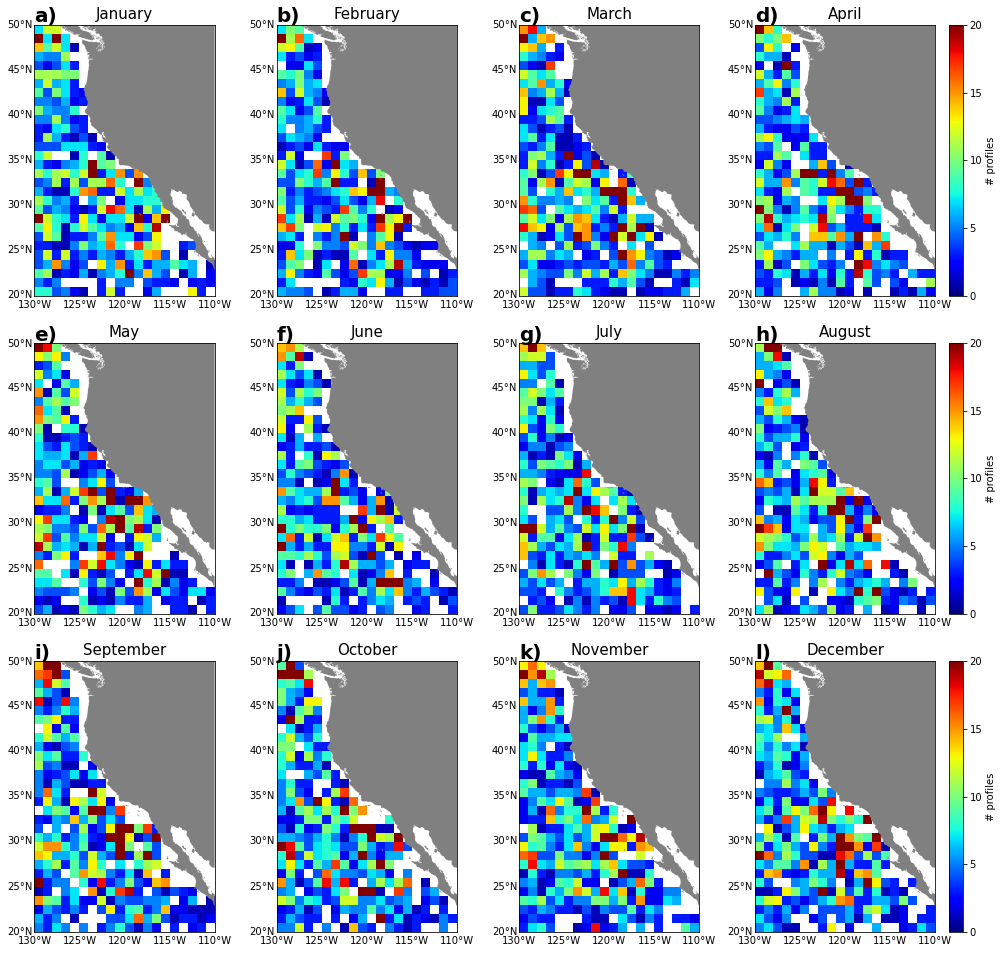

In [187]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  cs=m.pcolormesh(x1, y1, z,latlon=True,vmin=0, vmax=20,cmap='jet')
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,51,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115,-110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Read data from reanalysis

In [105]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/California/"
reanal=xr.open_dataset(ruta+'GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 230.0 230.2 230.5 230.8 ... 249.2 249.5 249.8 250.0
  * lat      (lat) float32 20.0 20.25 20.5 20.75 21.0 ... 49.25 49.5 49.75 50.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.7 34.69 34.69 34.69 ... nan nan nan

**Filter de 0 -100 dbar** (ARGO)

<AxesSubplot:>

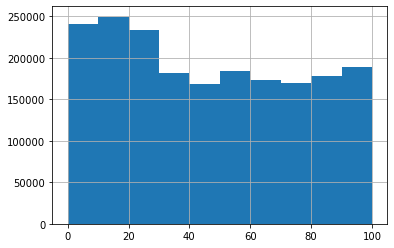

In [106]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [107]:
# count profiles per month
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (71499, 6)
Mes:  2 - Dimension: (65736, 6)
Mes:  3 - Dimension: (81610, 6)
Mes:  4 - Dimension: (76280, 6)
Mes:  5 - Dimension: (77499, 6)
Mes:  6 - Dimension: (73431, 6)
Mes:  7 - Dimension: (76074, 6)
Mes:  8 - Dimension: (78870, 6)
Mes:  9 - Dimension: (76772, 6)
Mes:  10 - Dimension: (78381, 6)
Mes:  11 - Dimension: (83901, 6)
Mes:  12 - Dimension: (85214, 6)


## Example for one month (ÇVertical interpolation Akima)

Ciclo 139 ......................... Check
Ciclo 138 ......................... Check


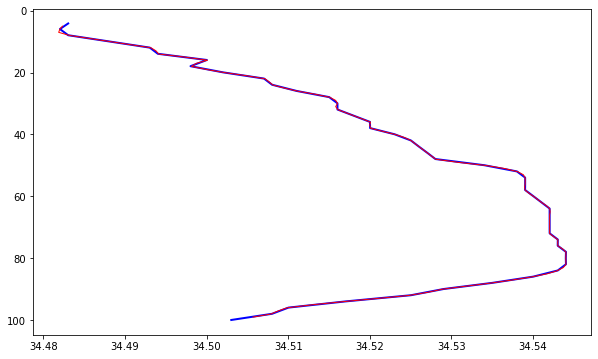

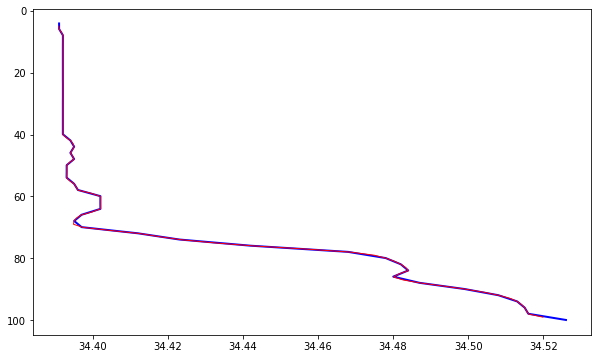

In [108]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  #print('------------------------------------')
  #print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos[0:2]:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Function to generalize

In [109]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validation-January

In [110]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero.head()

Intento fallido en Id: 4900089 Ciclo 17
Intento fallido en Id: 4900089 Ciclo 18
Intento fallido en Id: 4900098 Ciclo 12
Intento fallido en Id: 4900098 Ciclo 13
Intento fallido en Id: 4900098 Ciclo 14
Intento fallido en Id: 4900112 Ciclo 19
Intento fallido en Id: 4900112 Ciclo 20
Intento fallido en Id: 4900112 Ciclo 21
Intento fallido en Id: 4900112 Ciclo 22
Intento fallido en Id: 4900282 Ciclo 11
Intento fallido en Id: 4900282 Ciclo 12
Intento fallido en Id: 4900282 Ciclo 13
Intento fallido en Id: 4900102 Ciclo 19
Intento fallido en Id: 4900102 Ciclo 20
Intento fallido en Id: 4900102 Ciclo 18
Intento fallido en Id: 49069 Ciclo 27
Intento fallido en Id: 49069 Ciclo 26
Intento fallido en Id: 49069 Ciclo 25
Intento fallido en Id: 4900099 Ciclo 12
Intento fallido en Id: 4900099 Ciclo 13
Intento fallido en Id: 4900099 Ciclo 14
Intento fallido en Id: 4900097 Ciclo 13
Intento fallido en Id: 4900097 Ciclo 14
Intento fallido en Id: 4900281 Ciclo 13
Intento fallido en Id: 4900281 Ciclo 12
Intent

,Lon,Lat,Presion_interp,S_interp
0,-129.997,28.152,0,34.498704
1,-129.997,28.152,1,34.499175
2,-129.997,28.152,2,34.499647
3,-129.997,28.152,3,34.500119
4,-129.997,28.152,4,34.500591


In [111]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


(30, 20)


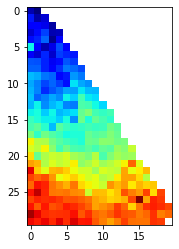

In [112]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [113]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


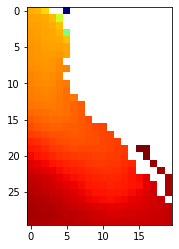

In [114]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

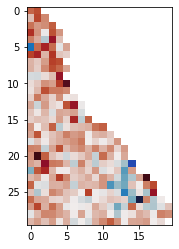

In [115]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-February

In [116]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero.head()

Intento fallido en Id: 4900113 Ciclo 23
Intento fallido en Id: 4900113 Ciclo 24
Intento fallido en Id: 4901530 Ciclo 17
Intento fallido en Id: 4900098 Ciclo 15
Intento fallido en Id: 4900098 Ciclo 16
Intento fallido en Id: 4900098 Ciclo 17
Intento fallido en Id: 4900102 Ciclo 23
Intento fallido en Id: 4900102 Ciclo 22
Intento fallido en Id: 4900102 Ciclo 21
Intento fallido en Id: 4900282 Ciclo 15
Intento fallido en Id: 4900282 Ciclo 14
Intento fallido en Id: 4900112 Ciclo 23
Intento fallido en Id: 4900112 Ciclo 24
Intento fallido en Id: 49069 Ciclo 30
Intento fallido en Id: 49069 Ciclo 29
Intento fallido en Id: 49069 Ciclo 28
Intento fallido en Id: 4900099 Ciclo 15
Intento fallido en Id: 4900099 Ciclo 16
Intento fallido en Id: 4900099 Ciclo 17
Intento fallido en Id: 4900089 Ciclo 19
Intento fallido en Id: 4900089 Ciclo 20
Intento fallido en Id: 4900089 Ciclo 21
Intento fallido en Id: 4900097 Ciclo 15
Intento fallido en Id: 4900097 Ciclo 16
Intento fallido en Id: 4900097 Ciclo 17
Intent

,Lon,Lat,Presion_interp,S_interp
0,-129.996,42.872,0,32.334133
1,-129.996,42.872,1,32.339499
2,-129.996,42.872,2,32.344864
3,-129.996,42.872,3,32.350230
4,-129.996,42.872,4,32.355595


In [117]:
import scipy
from scipy.interpolate import griddata
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)


(30, 20)


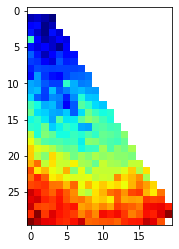

In [118]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [119]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


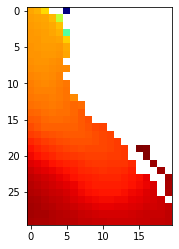

In [120]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

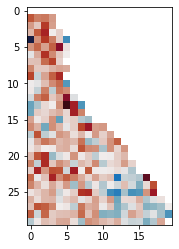

In [121]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-March

In [122]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo.head()

Intento fallido en Id: 4900073 Ciclo 3
Intento fallido en Id: 4900073 Ciclo 2
Intento fallido en Id: 4900113 Ciclo 26
Intento fallido en Id: 4900113 Ciclo 28
Intento fallido en Id: 4900113 Ciclo 25
Intento fallido en Id: 4900113 Ciclo 27
Intento fallido en Id: 4900282 Ciclo 18
Intento fallido en Id: 4900282 Ciclo 17
Intento fallido en Id: 4900282 Ciclo 16
Intento fallido en Id: 4900112 Ciclo 25
Intento fallido en Id: 4900112 Ciclo 26
Intento fallido en Id: 4900112 Ciclo 27
Intento fallido en Id: 4900097 Ciclo 18
Intento fallido en Id: 4900097 Ciclo 19
Intento fallido en Id: 4900097 Ciclo 20
Intento fallido en Id: 4900099 Ciclo 18
Intento fallido en Id: 4900099 Ciclo 19
Intento fallido en Id: 4900099 Ciclo 20
Intento fallido en Id: 49069 Ciclo 31
Intento fallido en Id: 49069 Ciclo 32
Intento fallido en Id: 49069 Ciclo 33
Intento fallido en Id: 4900089 Ciclo 22
Intento fallido en Id: 4900089 Ciclo 23
Intento fallido en Id: 4900089 Ciclo 24
Intento fallido en Id: 4900098 Ciclo 20
Intento 

,Lon,Lat,Presion_interp,S_interp
0,-129.9979,49.367,0,32.143111
1,-129.9979,49.367,1,32.297791
2,-129.9979,49.367,2,32.296204
3,-129.9979,49.367,3,32.294932
4,-129.9979,49.367,4,32.294143


In [123]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: total: 2.19 s
Wall time: 2.74 s


(30, 20)


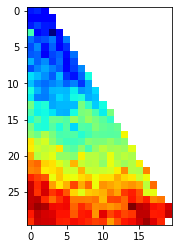

In [124]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [125]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


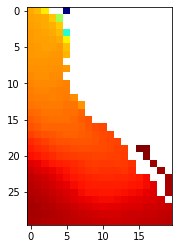

In [126]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

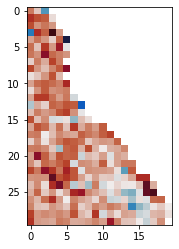

In [127]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-April

In [128]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril.head()

Intento fallido en Id: 49069 Ciclo 35
Intento fallido en Id: 49069 Ciclo 34
Intento fallido en Id: 4900097 Ciclo 23
Intento fallido en Id: 4900097 Ciclo 22
Intento fallido en Id: 4900097 Ciclo 21
Intento fallido en Id: 4900102 Ciclo 29
Intento fallido en Id: 4900098 Ciclo 23
Intento fallido en Id: 4900098 Ciclo 22
Intento fallido en Id: 4900098 Ciclo 21
Intento fallido en Id: 4900099 Ciclo 21
Intento fallido en Id: 4900099 Ciclo 22
Intento fallido en Id: 4900099 Ciclo 23
Intento fallido en Id: 4900113 Ciclo 29
Intento fallido en Id: 4900113 Ciclo 31
Intento fallido en Id: 4900113 Ciclo 30
Intento fallido en Id: 4900282 Ciclo 21
Intento fallido en Id: 4900282 Ciclo 20
Intento fallido en Id: 4900282 Ciclo 19
Intento fallido en Id: 4900281 Ciclo 19
Intento fallido en Id: 4900281 Ciclo 20
Intento fallido en Id: 4900281 Ciclo 21
Intento fallido en Id: 4900089 Ciclo 25
Intento fallido en Id: 4900089 Ciclo 26
Intento fallido en Id: 4900089 Ciclo 27
Intento fallido en Id: 4900112 Ciclo 29
Inte

,Lon,Lat,Presion_interp,S_interp
0,-129.991,20.737,0,34.821547
1,-129.991,20.737,1,34.822707
2,-129.991,20.737,2,34.823866
3,-129.991,20.737,3,34.825025
4,-129.991,20.737,4,34.826184


In [129]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: total: 2.02 s
Wall time: 2.87 s


(30, 20)


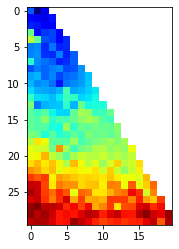

In [130]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [131]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


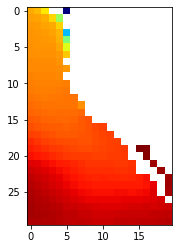

In [132]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

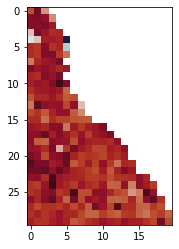

In [133]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-May

In [134]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo.head()

Intento fallido en Id: 4900254 Ciclo 72
Intento fallido en Id: 4900099 Ciclo 24
Intento fallido en Id: 4900099 Ciclo 25
Intento fallido en Id: 4900099 Ciclo 26
Intento fallido en Id: 4900282 Ciclo 22
Intento fallido en Id: 4900282 Ciclo 23
Intento fallido en Id: 4900282 Ciclo 24
Intento fallido en Id: 49069 Ciclo 38
Intento fallido en Id: 49069 Ciclo 37
Intento fallido en Id: 49069 Ciclo 36
Intento fallido en Id: 4900097 Ciclo 24
Intento fallido en Id: 4900097 Ciclo 25
Intento fallido en Id: 4900097 Ciclo 26
Intento fallido en Id: 4900102 Ciclo 32
Intento fallido en Id: 4900102 Ciclo 30
Intento fallido en Id: 4900102 Ciclo 31
Intento fallido en Id: 4900113 Ciclo 32
Intento fallido en Id: 4900113 Ciclo 34
Intento fallido en Id: 4900113 Ciclo 33
Intento fallido en Id: 4900281 Ciclo 24
Intento fallido en Id: 4900281 Ciclo 23
Intento fallido en Id: 4900281 Ciclo 22
Intento fallido en Id: 4900098 Ciclo 26
Intento fallido en Id: 4900098 Ciclo 25
Intento fallido en Id: 4900098 Ciclo 24
Intent

,Lon,Lat,Presion_interp,S_interp
0,-129.997,20.82,0,34.918694
1,-129.997,20.82,1,34.918765
2,-129.997,20.82,2,34.918836
3,-129.997,20.82,3,34.918906
4,-129.997,20.82,4,34.918977


In [135]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: total: 2.12 s
Wall time: 2.68 s


(30, 20)


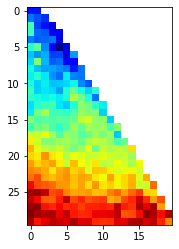

In [136]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [137]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


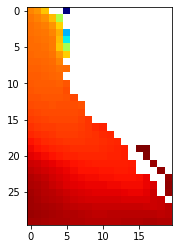

In [138]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

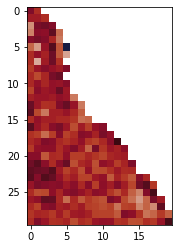

In [139]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-June

In [140]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio.head()

Intento fallido en Id: 4900282 Ciclo 25
Intento fallido en Id: 4900282 Ciclo 26
Intento fallido en Id: 4900282 Ciclo 27
Intento fallido en Id: 4900102 Ciclo 35
Intento fallido en Id: 4900102 Ciclo 33
Intento fallido en Id: 49069 Ciclo 39
Intento fallido en Id: 4900098 Ciclo 29
Intento fallido en Id: 4900098 Ciclo 28
Intento fallido en Id: 4900098 Ciclo 27
Intento fallido en Id: 4900281 Ciclo 27
Intento fallido en Id: 4900281 Ciclo 25
Intento fallido en Id: 4900281 Ciclo 26
Intento fallido en Id: 4900097 Ciclo 27
Intento fallido en Id: 4900097 Ciclo 29
Intento fallido en Id: 4900097 Ciclo 28
Intento fallido en Id: 4900113 Ciclo 35
Intento fallido en Id: 4900113 Ciclo 36
Intento fallido en Id: 4900113 Ciclo 37
Intento fallido en Id: 4900099 Ciclo 27
Intento fallido en Id: 4900099 Ciclo 29
Intento fallido en Id: 4900099 Ciclo 28
Intento fallido en Id: 4900254 Ciclo 76
Intento fallido en Id: 4900089 Ciclo 31
Intento fallido en Id: 4900089 Ciclo 32
Intento fallido en Id: 4900074 Ciclo 10
In

,Lon,Lat,Presion_interp,S_interp
0,-130.0,22.234,0,34.639268
1,-130.0,22.234,1,34.639455
2,-130.0,22.234,2,34.639642
3,-130.0,22.234,3,34.639830
4,-130.0,22.234,4,34.640017


In [141]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: total: 2.08 s
Wall time: 2.41 s


(30, 20)


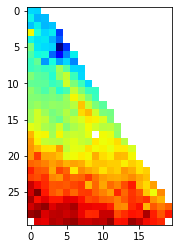

In [142]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [143]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


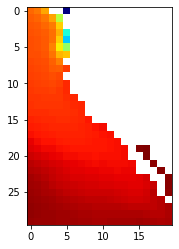

In [144]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

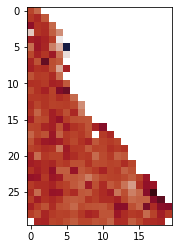

In [145]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-July

In [146]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio.head()

Intento fallido en Id: 4900098 Ciclo 30
Intento fallido en Id: 4900102 Ciclo 36
Intento fallido en Id: 4900102 Ciclo 37
Intento fallido en Id: 4900281 Ciclo 28
Intento fallido en Id: 4900281 Ciclo 29
Intento fallido en Id: 4900281 Ciclo 30
Intento fallido en Id: 4900099 Ciclo 32
Intento fallido en Id: 4900099 Ciclo 31
Intento fallido en Id: 4900099 Ciclo 30
Intento fallido en Id: 4900097 Ciclo 30
Intento fallido en Id: 4900097 Ciclo 31
Intento fallido en Id: 4900097 Ciclo 32
Intento fallido en Id: 4900113 Ciclo 38
Intento fallido en Id: 4900113 Ciclo 40
Intento fallido en Id: 4900113 Ciclo 39
Intento fallido en Id: 4900089 Ciclo 33
Intento fallido en Id: 4900089 Ciclo 34
Intento fallido en Id: 4900089 Ciclo 35
Intento fallido en Id: 4900282 Ciclo 28
Intento fallido en Id: 4900282 Ciclo 29
Intento fallido en Id: 4900282 Ciclo 30
Intento fallido en Id: 4902093 Ciclo 44
Intento fallido en Id: 4902093 Ciclo 46
Intento fallido en Id: 4900112 Ciclo 40
Intento fallido en Id: 4900112 Ciclo 38


,Lon,Lat,Presion_interp,S_interp
0,-129.998,39.679,0,32.870813
1,-129.998,39.679,1,32.871119
2,-129.998,39.679,2,32.871425
3,-129.998,39.679,3,32.871732
4,-129.998,39.679,4,32.872038


In [147]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: total: 2.47 s
Wall time: 3.16 s


(30, 20)


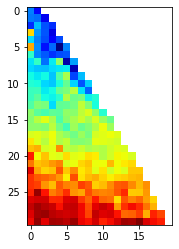

In [148]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [149]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


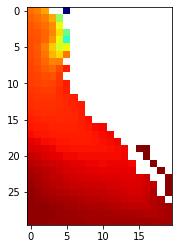

In [150]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

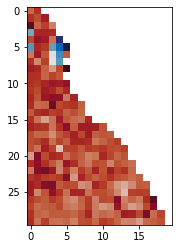

In [151]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-August

In [152]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto.head()

Intento fallido en Id: 4900099 Ciclo 34
Intento fallido en Id: 4900099 Ciclo 33
Intento fallido en Id: 4900281 Ciclo 31
Intento fallido en Id: 4900281 Ciclo 33
Intento fallido en Id: 4900281 Ciclo 32
Intento fallido en Id: 4900113 Ciclo 43
Intento fallido en Id: 4900113 Ciclo 42
Intento fallido en Id: 4900113 Ciclo 41
Intento fallido en Id: 4900089 Ciclo 38
Intento fallido en Id: 4900089 Ciclo 37
Intento fallido en Id: 4900089 Ciclo 36
Intento fallido en Id: 4900282 Ciclo 33
Intento fallido en Id: 4900282 Ciclo 32
Intento fallido en Id: 4900282 Ciclo 31
Intento fallido en Id: 4900254 Ciclo 80
Intento fallido en Id: 4900112 Ciclo 43
Intento fallido en Id: 4900112 Ciclo 42
Intento fallido en Id: 4900112 Ciclo 41
Intento fallido en Id: 4900096 Ciclo 35
Intento fallido en Id: 4900096 Ciclo 34
Intento fallido en Id: 4900096 Ciclo 33
Intento fallido en Id: 4900097 Ciclo 33
Intento fallido en Id: 4900097 Ciclo 34
Intento fallido en Id: 4900097 Ciclo 35
Tamaño de los dataframes generados : 201

,Lon,Lat,Presion_interp,S_interp
0,-129.994,23.371,0,34.574214
1,-129.994,23.371,1,34.573690
2,-129.994,23.371,2,34.573166
3,-129.994,23.371,3,34.572641
4,-129.994,23.371,4,34.572117


In [153]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: total: 2.33 s
Wall time: 2.65 s


(30, 20)


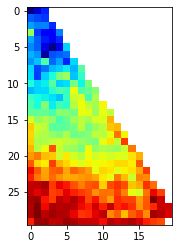

In [154]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [155]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


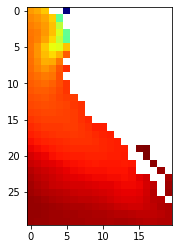

In [156]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

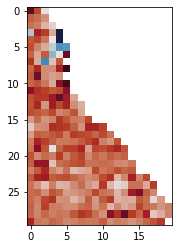

In [157]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-September

In [158]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre.head()

Intento fallido en Id: 5900964 Ciclo 287
Intento fallido en Id: 4900098 Ciclo 3
Intento fallido en Id: 4900098 Ciclo 2
Intento fallido en Id: 4900098 Ciclo 1
Intento fallido en Id: 4900113 Ciclo 46
Intento fallido en Id: 4900113 Ciclo 45
Intento fallido en Id: 4900113 Ciclo 44
Intento fallido en Id: 4900281 Ciclo 1
Intento fallido en Id: 4900281 Ciclo 36
Intento fallido en Id: 4900281 Ciclo 34
Intento fallido en Id: 4900281 Ciclo 35
Intento fallido en Id: 4900282 Ciclo 36
Intento fallido en Id: 4900282 Ciclo 35
Intento fallido en Id: 4900282 Ciclo 1
Intento fallido en Id: 4900282 Ciclo 34
Intento fallido en Id: 4900089 Ciclo 41
Intento fallido en Id: 4900089 Ciclo 40
Intento fallido en Id: 4900089 Ciclo 39
Intento fallido en Id: 4900073 Ciclo 95
Intento fallido en Id: 4900112 Ciclo 46
Intento fallido en Id: 4900112 Ciclo 45
Intento fallido en Id: 4900112 Ciclo 44
Intento fallido en Id: 4900099 Ciclo 3
Intento fallido en Id: 4900099 Ciclo 2
Intento fallido en Id: 4900099 Ciclo 1
Intento

,Lon,Lat,Presion_interp,S_interp
0,-129.9955,30.59756,0,NaN
1,-129.9955,30.59756,1,NaN
2,-129.9955,30.59756,2,32.8778
3,-129.9955,30.59756,3,NaN
4,-129.9955,30.59756,4,NaN


In [159]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: total: 2.36 s
Wall time: 3.06 s


(30, 20)


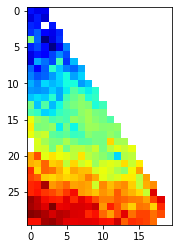

In [160]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [161]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


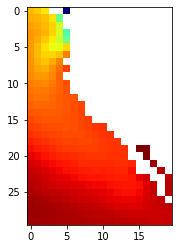

In [162]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

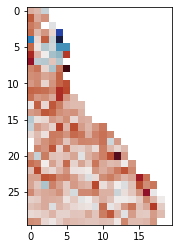

In [163]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-October

In [164]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre.head()

Intento fallido en Id: 4900281 Ciclo 2
Intento fallido en Id: 4900281 Ciclo 3
Intento fallido en Id: 4900281 Ciclo 4
Intento fallido en Id: 4900281 Ciclo 39
Intento fallido en Id: 4900281 Ciclo 38
Intento fallido en Id: 4900281 Ciclo 37
Intento fallido en Id: 4900073 Ciclo 61
Intento fallido en Id: 4900098 Ciclo 5
Intento fallido en Id: 4900098 Ciclo 4
Intento fallido en Id: 4900098 Ciclo 6
Intento fallido en Id: 4900113 Ciclo 48
Intento fallido en Id: 4900113 Ciclo 49
Intento fallido en Id: 4900113 Ciclo 47
Intento fallido en Id: 4900282 Ciclo 37
Intento fallido en Id: 4900282 Ciclo 4
Intento fallido en Id: 4900282 Ciclo 3
Intento fallido en Id: 4900282 Ciclo 38
Intento fallido en Id: 4900282 Ciclo 2
Intento fallido en Id: 4900282 Ciclo 39
Intento fallido en Id: 4900112 Ciclo 49
Intento fallido en Id: 4900112 Ciclo 48
Intento fallido en Id: 4900112 Ciclo 47
Intento fallido en Id: 4900089 Ciclo 42
Intento fallido en Id: 4900089 Ciclo 44
Intento fallido en Id: 4900089 Ciclo 43
Intento f

,Lon,Lat,Presion_interp,S_interp
0,-129.978,25.337,0,34.045805
1,-129.978,25.337,1,34.053479
2,-129.978,25.337,2,34.061154
3,-129.978,25.337,3,34.068828
4,-129.978,25.337,4,34.076502


In [165]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: total: 1.89 s
Wall time: 2.24 s


(30, 20)


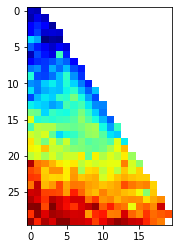

In [166]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [167]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


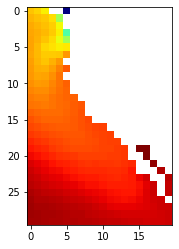

In [168]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

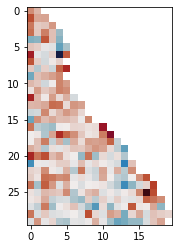

In [169]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-November

In [170]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre.head()

Intento fallido en Id: 4900112 Ciclo 52
Intento fallido en Id: 4900112 Ciclo 51
Intento fallido en Id: 4900112 Ciclo 50
Intento fallido en Id: 4900113 Ciclo 50
Intento fallido en Id: 4900113 Ciclo 51
Intento fallido en Id: 4900113 Ciclo 52
Intento fallido en Id: 4900281 Ciclo 5
Intento fallido en Id: 4900281 Ciclo 6
Intento fallido en Id: 4900281 Ciclo 40
Intento fallido en Id: 4900281 Ciclo 7
Intento fallido en Id: 4900281 Ciclo 41
Intento fallido en Id: 4900098 Ciclo 7
Intento fallido en Id: 4900098 Ciclo 8
Intento fallido en Id: 4900282 Ciclo 7
Intento fallido en Id: 4900282 Ciclo 5
Intento fallido en Id: 4900282 Ciclo 6
Intento fallido en Id: 4900282 Ciclo 40
Intento fallido en Id: 4900282 Ciclo 41
Intento fallido en Id: 4900089 Ciclo 46
Intento fallido en Id: 4900089 Ciclo 45
Intento fallido en Id: 4900089 Ciclo 47
Intento fallido en Id: 4900099 Ciclo 8
Intento fallido en Id: 4900099 Ciclo 7
Intento fallido en Id: 4900099 Ciclo 41
Intento fallido en Id: 4900099 Ciclo 42
Intento fa

,Lon,Lat,Presion_interp,S_interp
0,-129.995,23.278,0,34.496415
1,-129.995,23.278,1,34.495475
2,-129.995,23.278,2,34.494534
3,-129.995,23.278,3,34.493594
4,-129.995,23.278,4,34.492654


In [171]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: total: 2.11 s
Wall time: 2.19 s


(30, 20)


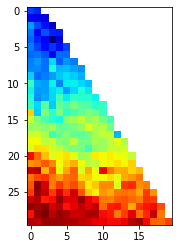

In [172]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [173]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


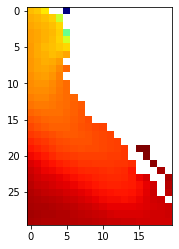

In [174]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

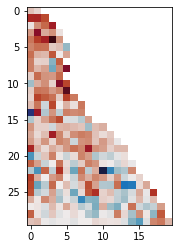

In [175]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-December

In [176]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre.head()

Intento fallido en Id: 49069 Ciclo 58
Intento fallido en Id: 4900281 Ciclo 44
Intento fallido en Id: 4900281 Ciclo 8
Intento fallido en Id: 4900281 Ciclo 9
Intento fallido en Id: 4900281 Ciclo 43
Intento fallido en Id: 4900281 Ciclo 42
Intento fallido en Id: 4900281 Ciclo 10
Intento fallido en Id: 4900112 Ciclo 55
Intento fallido en Id: 4900112 Ciclo 54
Intento fallido en Id: 4900112 Ciclo 53
Intento fallido en Id: 4900073 Ciclo 65
Intento fallido en Id: 4900073 Ciclo 102
Intento fallido en Id: 4900098 Ciclo 9
Intento fallido en Id: 4900098 Ciclo 10
Intento fallido en Id: 4900098 Ciclo 11
Intento fallido en Id: 4900113 Ciclo 54
Intento fallido en Id: 4900113 Ciclo 53
Intento fallido en Id: 4900113 Ciclo 55
Intento fallido en Id: 4900282 Ciclo 44
Intento fallido en Id: 4900282 Ciclo 10
Intento fallido en Id: 4900282 Ciclo 9
Intento fallido en Id: 4900282 Ciclo 43
Intento fallido en Id: 4900282 Ciclo 8
Intento fallido en Id: 4900282 Ciclo 42
Intento fallido en Id: 4900089 Ciclo 48
Intent

,Lon,Lat,Presion_interp,S_interp
0,-129.987,35.927,0,33.976376
1,-129.987,35.927,1,33.975229
2,-129.987,35.927,2,33.974081
3,-129.987,35.927,3,33.972934
4,-129.987,35.927,4,33.971787


In [177]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-130+0.5,-110+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(20+0.5, 50+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: total: 2.05 s
Wall time: 2.62 s


(30, 20)


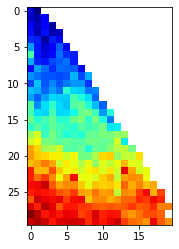

In [178]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [179]:
x1= np.arange(-130+0.5, -110+0.5,1)
y1= list(np.arange(20+0.5, 50+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


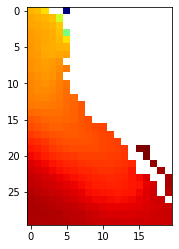

In [180]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

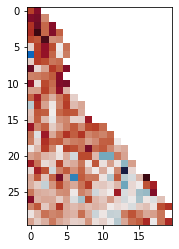

In [181]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Taylor diagram

In [182]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [183]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.928068,0.975559,0.226238,January
1,0.936368,0.971456,0.242070,February
2,0.956841,0.965754,0.264412,March
3,1.019980,0.945194,0.337096,April
4,1.013884,0.955568,0.303304,May
5,1.092312,0.943201,0.366067,June
6,1.081254,0.926459,0.407038,July
7,1.044894,0.943065,0.348391,August
8,0.995795,0.953316,0.304968,September
9,0.940545,0.961763,0.274740,October


In [184]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/California/"
dfr.to_csv(ruta+'Datos_Taylor_Validacion_Salinidad_California.csv',index=False)

In [185]:
from taylorDiagram_mod import TaylorDiagram as TaDiM
dfr=pd.read_csv(ruta+'Datos_Taylor_Validacion_Salinidad_California.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

Text(1.0, 0.21, 'RMSE')

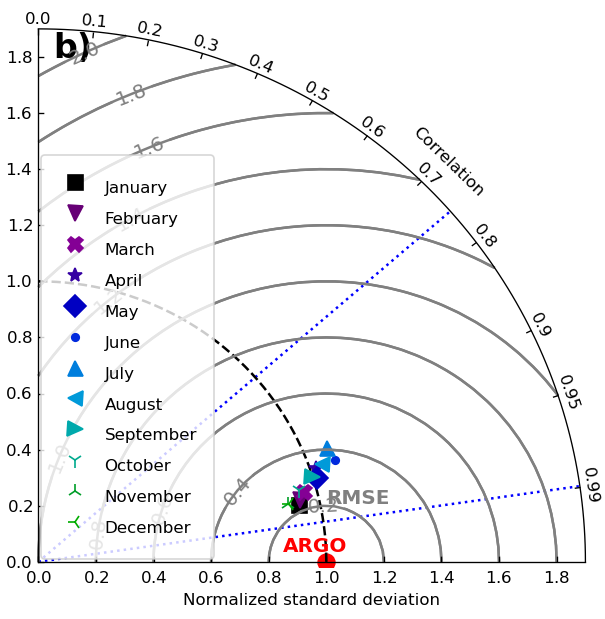

In [186]:
import numpy as NP
#figID_Taylor = plt.figure(num=25, dpi=240)
#figID_Taylor.set_size_inches(6., 6.)
figID_Taylor = plt.figure(num=20, dpi=120)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'b)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

## Spatial comparison

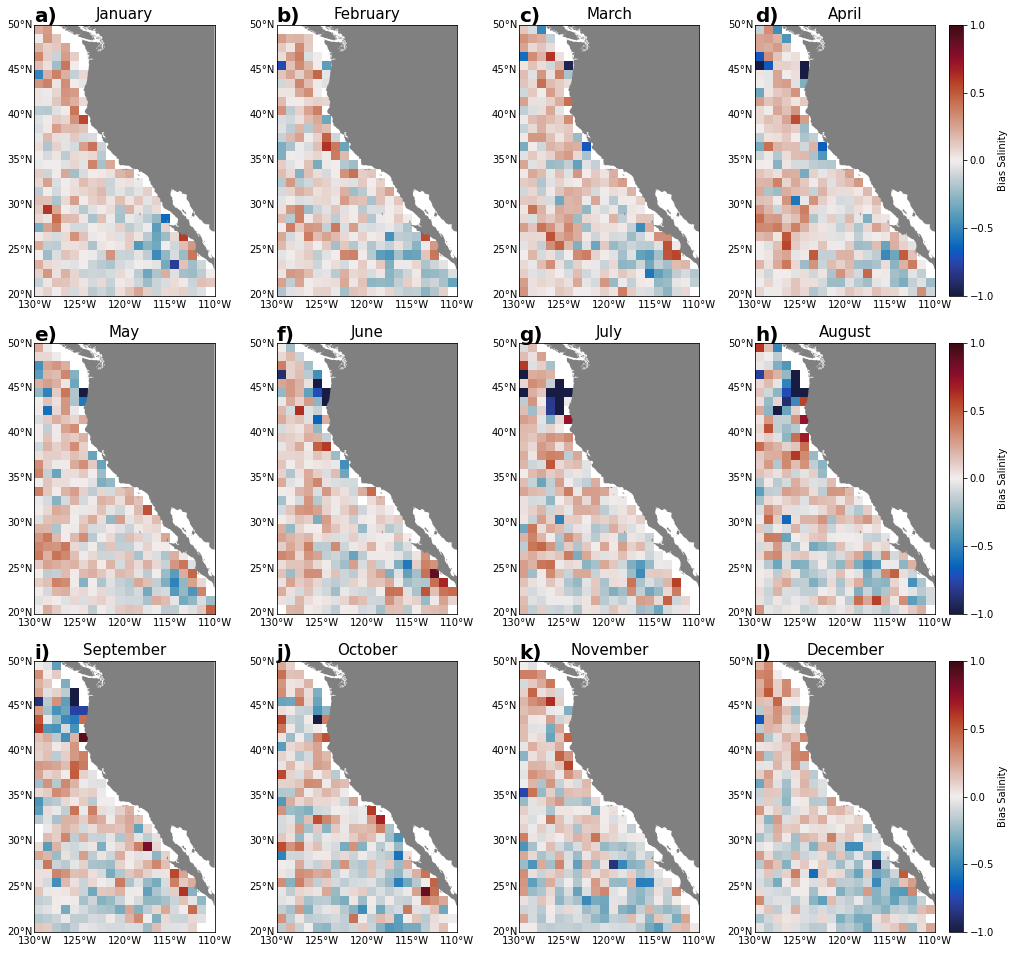

In [188]:
import string
x1= np.arange(-130+0.5, -110+0.5,1);y1= list(np.arange(20+0.5,50+0.5,1));y1=y1[::-1];y1= np.array(y1);
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,51,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115,-110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# Canarias

## Read raw data (ARGO)

In [2]:
%cd "E:/Validation_EBUS_DavidBU/Argo data download/Canarias/Core/"

E:\Validation_EBUS_DavidBU\Argo data download\Canarias\Core


In [3]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(3691469, 14)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Ciclo,Id,Year,Month,Day
0,2003-01-05 19:59:22,-12.433,35.373001,10.0,10.0,17.559999,17.559999,36.296001,36.296040,31,1900041,2003,1,5
1,2003-01-05 19:59:22,-12.433,35.373001,20.0,20.0,17.556000,17.556000,36.296001,36.296040,31,1900041,2003,1,5
2,2003-01-05 19:59:22,-12.433,35.373001,30.0,30.0,17.552000,17.552000,36.299999,36.299965,31,1900041,2003,1,5
3,2003-01-05 19:59:22,-12.433,35.373001,40.0,40.0,17.554001,17.554001,36.299999,36.299992,31,1900041,2003,1,5
4,2003-01-05 19:59:22,-12.433,35.373001,50.0,50.0,17.556000,17.556000,36.299999,36.299984,31,1900041,2003,1,5


In [4]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(3691469, 14)
(28699, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2003-01-05 19:59:22,-12.433,35.373001,31,1
34,2003-09-04 02:30:45,-11.675,36.362000,55,9
68,2003-10-04 05:11:35,-13.180,36.423000,58,10
102,2003-10-14 04:59:05,-13.620,35.443001,59,10
136,2003-10-24 14:28:16,-12.752,35.314999,60,10


In [5]:
# Count by month
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 235
Mes:  2 237
Mes:  3 246
Mes:  4 242
Mes:  5 246
Mes:  6 267
Mes:  7 346
Mes:  8 333
Mes:  9 242
Mes:  10 241
Mes:  11 251
Mes:  12 236


In [6]:
# Function to count profiles
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(-25,-5+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(15,45+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [7]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

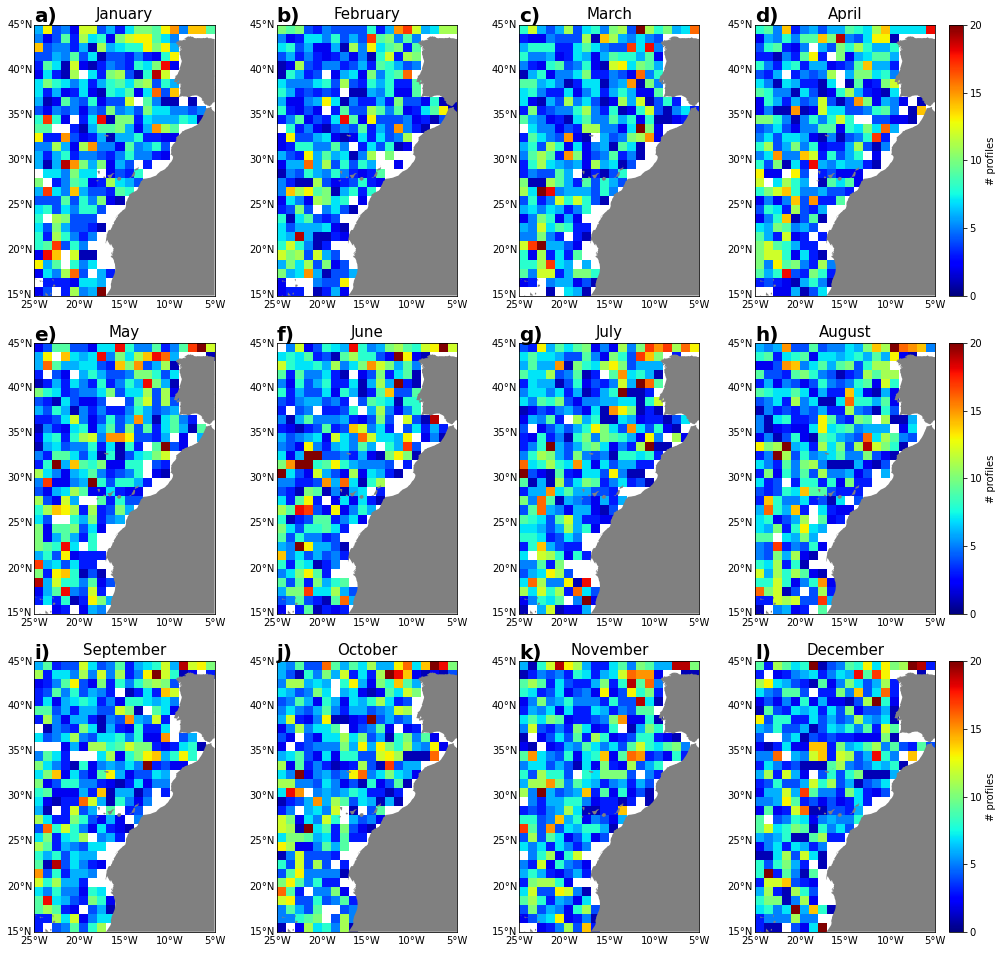

In [8]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  cs=m.pcolormesh(x1, y1, z,cmap='jet',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(15,46,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-25,-20,-15,-10,-5],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Read data from reanalysis

In [9]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Canarias/"
reanal=xr.open_dataset(ruta+'GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 335.0 335.2 335.5 335.8 ... 354.2 354.5 354.8 355.0
  * lat      (lat) float32 15.0 15.25 15.5 15.75 16.0 ... 44.25 44.5 44.75 45.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 36.03 36.03 36.05 ... 35.63 35.62 35.61

**Filter 0 -100 dbar** (ARGO)

<AxesSubplot:>

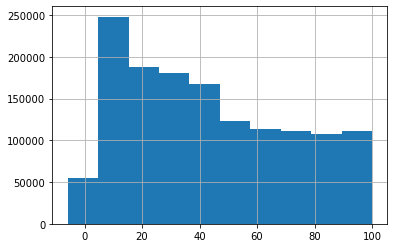

In [10]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [11]:
# Count by month
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (46725, 6)
Mes:  2 - Dimension: (40936, 6)
Mes:  3 - Dimension: (48339, 6)
Mes:  4 - Dimension: (48495, 6)
Mes:  5 - Dimension: (60879, 6)
Mes:  6 - Dimension: (83055, 6)
Mes:  7 - Dimension: (84594, 6)
Mes:  8 - Dimension: (65524, 6)
Mes:  9 - Dimension: (51516, 6)
Mes:  10 - Dimension: (56185, 6)
Mes:  11 - Dimension: (56131, 6)
Mes:  12 - Dimension: (53717, 6)


## Example for one month (Vertical interpolation Akima)

------------------------------------
Id : 1900983
Ciclo 40 ......................... Check
Ciclo 39 ......................... Check


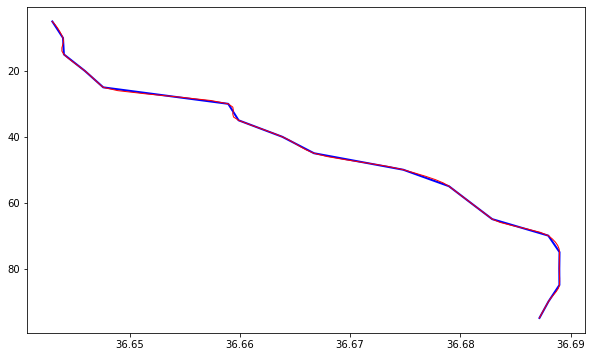

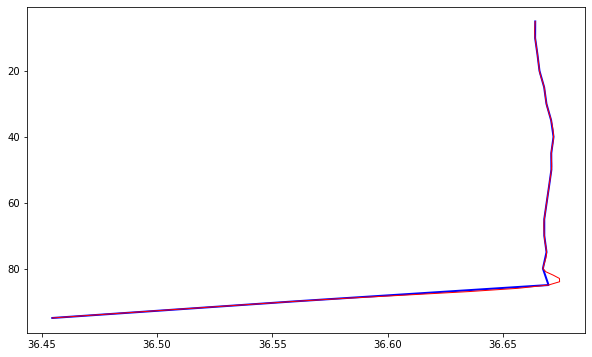

In [13]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos[0:2]:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Function to generalize

In [14]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validation-January

In [15]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero.head()

Intento fallido en Id: 6900167 Ciclo 99
Intento fallido en Id: 6901619 Ciclo 1
Intento fallido en Id: 6900404 Ciclo 169
Intento fallido en Id: 6900404 Ciclo 168
Intento fallido en Id: 6900404 Ciclo 170
Intento fallido en Id: 6900402 Ciclo 59
Intento fallido en Id: 6900048 Ciclo 12
Intento fallido en Id: 6900048 Ciclo 11
Intento fallido en Id: 69036 Ciclo 85
Intento fallido en Id: 6901417 Ciclo 1
Intento fallido en Id: 6900178 Ciclo 94
Intento fallido en Id: 1901363 Ciclo 23
Intento fallido en Id: 6900046 Ciclo 17
Intento fallido en Id: 6900046 Ciclo 18
Intento fallido en Id: 6900046 Ciclo 16
Intento fallido en Id: 6900130 Ciclo 7
Intento fallido en Id: 6900130 Ciclo 9
Intento fallido en Id: 6900045 Ciclo 17
Intento fallido en Id: 6900045 Ciclo 18
Intento fallido en Id: 6900234 Ciclo 39
Intento fallido en Id: 6900234 Ciclo 4
Intento fallido en Id: 1900041 Ciclo 69
Intento fallido en Id: 1900041 Ciclo 68
Intento fallido en Id: 1900041 Ciclo 67
Intento fallido en Id: 6900137 Ciclo 59
Inte

,Lon,Lat,Presion_interp,S_interp
0,-24.994,31.964,0,36.637978
1,-24.994,31.964,1,36.638614
2,-24.994,31.964,2,36.639250
3,-24.994,31.964,3,36.639886
4,-24.994,31.964,4,36.640521


In [16]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


(30, 20)


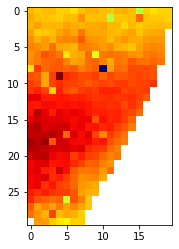

In [17]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [18]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values-360,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


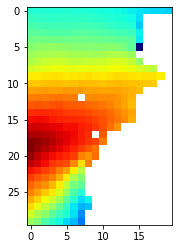

In [19]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

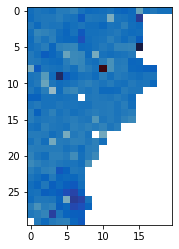

In [21]:
# Diferencia entre modelo y ARGO
import cmocean
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-February

In [22]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero.head()

Intento fallido en Id: 6900630 Ciclo 0
Intento fallido en Id: 6900404 Ciclo 172
Intento fallido en Id: 6900404 Ciclo 171
Intento fallido en Id: 1900943 Ciclo 0
Intento fallido en Id: 6900048 Ciclo 13
Intento fallido en Id: 6900402 Ciclo 62
Intento fallido en Id: 6900631 Ciclo 1
Intento fallido en Id: 1901363 Ciclo 61
Intento fallido en Id: 6900046 Ciclo 20
Intento fallido en Id: 6900628 Ciclo 0
Intento fallido en Id: 6900045 Ciclo 20
Intento fallido en Id: 6900627 Ciclo 0
Intento fallido en Id: 6900632 Ciclo 1
Intento fallido en Id: 6900234 Ciclo 81
Intento fallido en Id: 6900234 Ciclo 79
Intento fallido en Id: 1900041 Ciclo 71
Intento fallido en Id: 1900041 Ciclo 70
Intento fallido en Id: 1900041 Ciclo 72
Intento fallido en Id: 6900162 Ciclo 11
Intento fallido en Id: 6900162 Ciclo 12
Intento fallido en Id: 6900134 Ciclo 25
Intento fallido en Id: 6900180 Ciclo 60
Intento fallido en Id: 6900136 Ciclo 25
Intento fallido en Id: 6900141 Ciclo 43
Intento fallido en Id: 6900238 Ciclo 58
Inte

,Lon,Lat,Presion_interp,S_interp
0,-24.989,39.238,0,36.011912
1,-24.989,39.238,1,36.011532
2,-24.989,39.238,2,36.011152
3,-24.989,39.238,3,36.010771
4,-24.989,39.238,4,36.003965


In [23]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)
CPU times: total: 2.59 s
Wall time: 3.81 s


(30, 20)


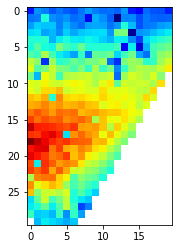

In [24]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [25]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values-360,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


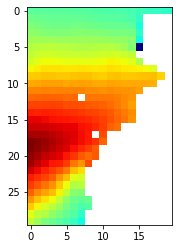

In [26]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

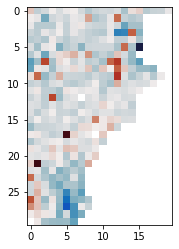

In [27]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-March

In [28]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo.head()

Intento fallido en Id: 4900155 Ciclo 84
Intento fallido en Id: 6900404 Ciclo 139
Intento fallido en Id: 6900404 Ciclo 138
Intento fallido en Id: 6900046 Ciclo 22
Intento fallido en Id: 6900046 Ciclo 23
Intento fallido en Id: 6900130 Ciclo 14
Intento fallido en Id: 6900130 Ciclo 13
Intento fallido en Id: 1900041 Ciclo 73
Intento fallido en Id: 1900041 Ciclo 74
Intento fallido en Id: 1900041 Ciclo 75
Intento fallido en Id: 6900045 Ciclo 23
Intento fallido en Id: 6900045 Ciclo 22
Intento fallido en Id: 6900372 Ciclo 106
Intento fallido en Id: 6900234 Ciclo 84
Intento fallido en Id: 6900162 Ciclo 88
Intento fallido en Id: 6900162 Ciclo 89
Intento fallido en Id: 6900162 Ciclo 87
Intento fallido en Id: 6900162 Ciclo 13
Intento fallido en Id: 6900162 Ciclo 52
Intento fallido en Id: 6900137 Ciclo 64
Intento fallido en Id: 6900134 Ciclo 27
Intento fallido en Id: 6900134 Ciclo 26
Intento fallido en Id: 6900136 Ciclo 27
Intento fallido en Id: 6900238 Ciclo 61
Intento fallido en Id: 6900238 Ciclo 

,Lon,Lat,Presion_interp,S_interp
0,-24.979,43.745,0,35.933902
1,-24.979,43.745,1,35.933026
2,-24.979,43.745,2,35.932150
3,-24.979,43.745,3,35.931274
4,-24.979,43.745,4,35.930397


In [29]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: total: 2.12 s
Wall time: 2.39 s


(30, 20)


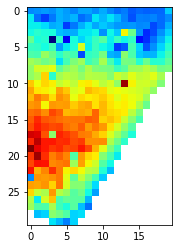

In [30]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [31]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values-360,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


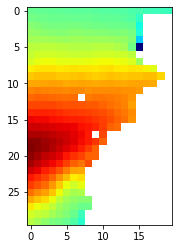

In [32]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

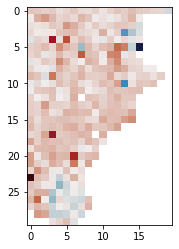

In [33]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-April

In [34]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril.head()

Intento fallido en Id: 4900155 Ciclo 85
Intento fallido en Id: 4900155 Ciclo 87
Intento fallido en Id: 6900404 Ciclo 142
Intento fallido en Id: 6900404 Ciclo 140
Intento fallido en Id: 6900404 Ciclo 141
Intento fallido en Id: 6900402 Ciclo 141
Intento fallido en Id: 6900402 Ciclo 142
Intento fallido en Id: 1901363 Ciclo 32
Intento fallido en Id: 6900163 Ciclo 33
Intento fallido en Id: 6900163 Ciclo 34
Intento fallido en Id: 6900163 Ciclo 35
Intento fallido en Id: 6900130 Ciclo 16
Intento fallido en Id: 6900046 Ciclo 26
Intento fallido en Id: 6900046 Ciclo 25
Intento fallido en Id: 6900372 Ciclo 116
Intento fallido en Id: 3902126 Ciclo 1
Intento fallido en Id: 6900045 Ciclo 26
Intento fallido en Id: 6900045 Ciclo 25
Intento fallido en Id: 1900349 Ciclo 0
Intento fallido en Id: 1900041 Ciclo 78
Intento fallido en Id: 1900041 Ciclo 77
Intento fallido en Id: 1900041 Ciclo 76
Intento fallido en Id: 6900916 Ciclo 1
Intento fallido en Id: 1900350 Ciclo 0
Intento fallido en Id: 6900162 Ciclo 1

,Lon,Lat,Presion_interp,S_interp
0,-24.996,38.283,0,36.140175
1,-24.996,38.283,1,36.139467
2,-24.996,38.283,2,36.138758
3,-24.996,38.283,3,36.138049
4,-24.996,38.283,4,36.137341


In [35]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: total: 2.05 s
Wall time: 2.17 s


(30, 20)


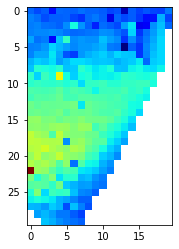

In [36]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [37]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values-360,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


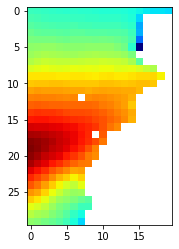

In [38]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

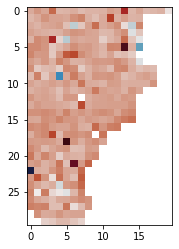

In [39]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-May

In [40]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo.head()

Intento fallido en Id: 4900155 Ciclo 90
Intento fallido en Id: 4900155 Ciclo 88
Intento fallido en Id: 6900404 Ciclo 145
Intento fallido en Id: 6900404 Ciclo 144
Intento fallido en Id: 6900404 Ciclo 143
Intento fallido en Id: 6900402 Ciclo 145
Intento fallido en Id: 6900402 Ciclo 143
Intento fallido en Id: 6900402 Ciclo 144
Intento fallido en Id: 6900046 Ciclo 30
Intento fallido en Id: 6900046 Ciclo 29
Intento fallido en Id: 6900046 Ciclo 28
Intento fallido en Id: 1901363 Ciclo 69
Intento fallido en Id: 6901620 Ciclo 1
Intento fallido en Id: 6900045 Ciclo 28
Intento fallido en Id: 6900045 Ciclo 29
Intento fallido en Id: 6900045 Ciclo 30
Intento fallido en Id: 6900234 Ciclo 15
Intento fallido en Id: 6901569 Ciclo 1
Intento fallido en Id: 6900708 Ciclo 1
Intento fallido en Id: 1900041 Ciclo 81
Intento fallido en Id: 1900041 Ciclo 79
Intento fallido en Id: 1900041 Ciclo 80
Intento fallido en Id: 6901567 Ciclo 1
Intento fallido en Id: 6900162 Ciclo 19
Intento fallido en Id: 6900137 Ciclo 6

,Lon,Lat,Presion_interp,S_interp
0,-24.989,26.458,0,37.369136
1,-24.989,26.458,1,37.367726
2,-24.989,26.458,2,37.366316
3,-24.989,26.458,3,37.364906
4,-24.989,26.458,4,37.363496


In [41]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: total: 2.16 s
Wall time: 2.18 s


(30, 20)


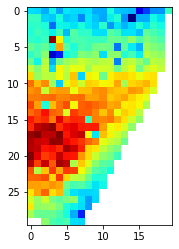

In [42]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [43]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values-360,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


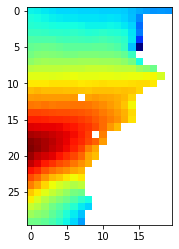

In [44]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

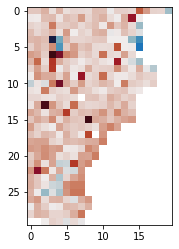

In [45]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-June

In [46]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio.head()

Intento fallido en Id: 6900404 Ciclo 147
Intento fallido en Id: 6900404 Ciclo 148
Intento fallido en Id: 6900402 Ciclo 148
Intento fallido en Id: 6900402 Ciclo 146
Intento fallido en Id: 6900181 Ciclo 30
Intento fallido en Id: 6900958 Ciclo 1
Intento fallido en Id: 6902552 Ciclo 1
Intento fallido en Id: 6900046 Ciclo 32
Intento fallido en Id: 6900046 Ciclo 33
Intento fallido en Id: 6900167 Ciclo 5
Intento fallido en Id: 6900167 Ciclo 4
Intento fallido en Id: 6900167 Ciclo 3
Intento fallido en Id: 6900493 Ciclo 0
Intento fallido en Id: 6901256 Ciclo 1
Intento fallido en Id: 6901262 Ciclo 1
Intento fallido en Id: 5902308 Ciclo 0
Intento fallido en Id: 6900048 Ciclo 26
Intento fallido en Id: 6900048 Ciclo 27
Intento fallido en Id: 6902553 Ciclo 1
Intento fallido en Id: 6901258 Ciclo 1
Intento fallido en Id: 6900494 Ciclo 0
Intento fallido en Id: 1900041 Ciclo 84
Intento fallido en Id: 1900041 Ciclo 83
Intento fallido en Id: 1900041 Ciclo 82
Intento fallido en Id: 3901932 Ciclo 1
Intento f

,Lon,Lat,Presion_interp,S_interp
0,-24.997,26.631,0,37.472256
1,-24.997,26.631,1,37.468785
2,-24.997,26.631,2,37.465313
3,-24.997,26.631,3,37.461842
4,-24.997,26.631,4,37.458371


In [47]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: total: 2.16 s
Wall time: 2.24 s


(30, 20)


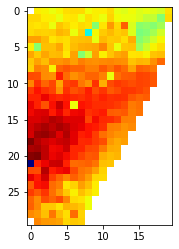

In [48]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [49]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values-360,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


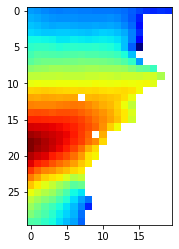

In [50]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

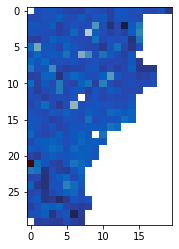

In [51]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-July

In [52]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio.head()

Intento fallido en Id: 4901588 Ciclo 145
Intento fallido en Id: 1901206 Ciclo 1
Intento fallido en Id: 6900450 Ciclo 222
Intento fallido en Id: 6900167 Ciclo 44
Intento fallido en Id: 6900167 Ciclo 8
Intento fallido en Id: 6900167 Ciclo 7
Intento fallido en Id: 6900167 Ciclo 6
Intento fallido en Id: 6900404 Ciclo 149
Intento fallido en Id: 6900404 Ciclo 150
Intento fallido en Id: 6900404 Ciclo 151
Intento fallido en Id: 6900402 Ciclo 149
Intento fallido en Id: 6900402 Ciclo 152
Intento fallido en Id: 6900402 Ciclo 151
Intento fallido en Id: 6900402 Ciclo 150
Intento fallido en Id: 6900911 Ciclo 1
Intento fallido en Id: 6900046 Ciclo 35
Intento fallido en Id: 6900046 Ciclo 36
Intento fallido en Id: 1901192 Ciclo 1
Intento fallido en Id: 6900048 Ciclo 29
Intento fallido en Id: 6900048 Ciclo 30
Intento fallido en Id: 1901208 Ciclo 1
Intento fallido en Id: 6900237 Ciclo 0
Intento fallido en Id: 1900352 Ciclo 0
Intento fallido en Id: 1900041 Ciclo 88
Intento fallido en Id: 1900041 Ciclo 87


,Lon,Lat,Presion_interp,S_interp
0,-24.972,15.562,0,36.331111
1,-24.972,15.562,1,36.331066
2,-24.972,15.562,2,36.331022
3,-24.972,15.562,3,36.330978
4,-24.972,15.562,4,36.330933


In [53]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: total: 2.11 s
Wall time: 2.26 s


(30, 20)


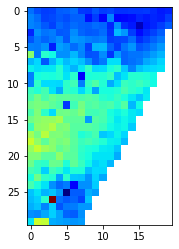

In [54]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [55]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values-360,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


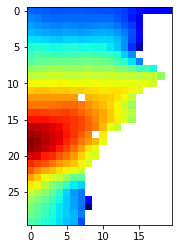

In [56]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

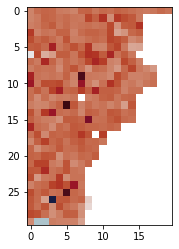

In [57]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-August

In [58]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto.head()

Intento fallido en Id: 6900402 Ciclo 155
Intento fallido en Id: 6900402 Ciclo 154
Intento fallido en Id: 6900402 Ciclo 153
Intento fallido en Id: 6900167 Ciclo 11
Intento fallido en Id: 6900167 Ciclo 10
Intento fallido en Id: 6900167 Ciclo 45
Intento fallido en Id: 6900167 Ciclo 47
Intento fallido en Id: 6900167 Ciclo 46
Intento fallido en Id: 6900167 Ciclo 9
Intento fallido en Id: 3901622 Ciclo 1
Intento fallido en Id: 6902664 Ciclo 1
Intento fallido en Id: 6900404 Ciclo 154
Intento fallido en Id: 6900404 Ciclo 153
Intento fallido en Id: 6900404 Ciclo 152
Intento fallido en Id: 6900048 Ciclo 33
Intento fallido en Id: 6900048 Ciclo 32
Intento fallido en Id: 6900234 Ciclo 26
Intento fallido en Id: 6900411 Ciclo 46
Intento fallido en Id: 6900046 Ciclo 38
Intento fallido en Id: 6900046 Ciclo 39
Intento fallido en Id: 3902127 Ciclo 1
Intento fallido en Id: 6902663 Ciclo 1
Intento fallido en Id: 6900968 Ciclo 1
Intento fallido en Id: 6900163 Ciclo 10
Intento fallido en Id: 6900163 Ciclo 11


,Lon,Lat,Presion_interp,S_interp
0,-24.9956,34.34636,0,36.959220
1,-24.9956,34.34636,1,36.954953
2,-24.9956,34.34636,2,36.908484
3,-24.9956,34.34636,3,36.908120
4,-24.9956,34.34636,4,36.903250


In [59]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: total: 1.98 s
Wall time: 4.22 s


(30, 20)


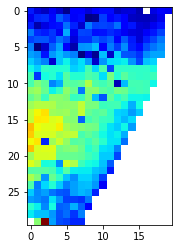

In [60]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [61]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values-360,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


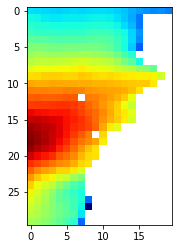

In [62]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

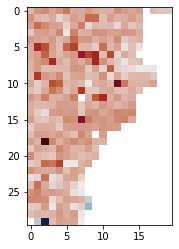

In [63]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-September

In [64]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre.head()

Intento fallido en Id: 3901989 Ciclo 1
Intento fallido en Id: 6901672 Ciclo 1
Intento fallido en Id: 6900404 Ciclo 156
Intento fallido en Id: 6900404 Ciclo 155
Intento fallido en Id: 6900167 Ciclo 48
Intento fallido en Id: 6900167 Ciclo 49
Intento fallido en Id: 6900167 Ciclo 50
Intento fallido en Id: 6900166 Ciclo 51
Intento fallido en Id: 3901951 Ciclo 1
Intento fallido en Id: 1900041 Ciclo 94
Intento fallido en Id: 1900041 Ciclo 93
Intento fallido en Id: 1900041 Ciclo 92
Intento fallido en Id: 6900048 Ciclo 35
Intento fallido en Id: 6900048 Ciclo 36
Intento fallido en Id: 1901204 Ciclo 158
Intento fallido en Id: 6900181 Ciclo 1
Intento fallido en Id: 6900181 Ciclo 2
Intento fallido en Id: 6900046 Ciclo 41
Intento fallido en Id: 6900046 Ciclo 42
Intento fallido en Id: 6900163 Ciclo 12
Intento fallido en Id: 6900163 Ciclo 13
Intento fallido en Id: 6900163 Ciclo 14
Intento fallido en Id: 3901943 Ciclo 1
Intento fallido en Id: 6902710 Ciclo 40
Intento fallido en Id: 6900237 Ciclo 8
Inte

,Lon,Lat,Presion_interp,S_interp
0,-25.0,30.13,0,36.994420
1,-25.0,30.13,1,36.992307
2,-25.0,30.13,2,36.990193
3,-25.0,30.13,3,36.988080
4,-25.0,30.13,4,36.978110


In [65]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: total: 1.84 s
Wall time: 2.77 s


(30, 20)


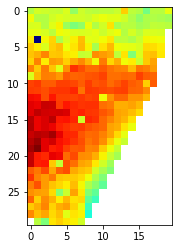

In [66]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [67]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values-360,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


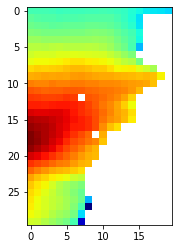

In [68]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

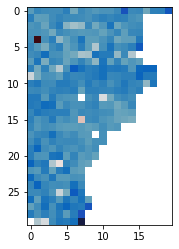

In [69]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-October

In [70]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre.head()

Intento fallido en Id: 6900404 Ciclo 159
Intento fallido en Id: 6900404 Ciclo 160
Intento fallido en Id: 6900404 Ciclo 161
Intento fallido en Id: 6900404 Ciclo 85
Intento fallido en Id: 6901415 Ciclo 1
Intento fallido en Id: 6900167 Ciclo 51
Intento fallido en Id: 6900167 Ciclo 52
Intento fallido en Id: 6900167 Ciclo 53
Intento fallido en Id: 1900572 Ciclo 2
Intento fallido en Id: 1900572 Ciclo 1
Intento fallido en Id: 1900572 Ciclo 0
Intento fallido en Id: 1900041 Ciclo 97
Intento fallido en Id: 1900041 Ciclo 95
Intento fallido en Id: 1900041 Ciclo 96
Intento fallido en Id: 6901623 Ciclo 1
Intento fallido en Id: 6901410 Ciclo 1
Intento fallido en Id: 6901665 Ciclo 1
Intento fallido en Id: 6900181 Ciclo 5
Intento fallido en Id: 6900181 Ciclo 4
Intento fallido en Id: 6900181 Ciclo 3
Intento fallido en Id: 6900048 Ciclo 38
Intento fallido en Id: 6901411 Ciclo 1
Intento fallido en Id: 6900163 Ciclo 15
Intento fallido en Id: 6900163 Ciclo 16
Intento fallido en Id: 6900163 Ciclo 17
Intento 

,Lon,Lat,Presion_interp,S_interp
0,-24.995,22.016,0,36.492426
1,-24.995,22.016,1,36.498441
2,-24.995,22.016,2,36.504455
3,-24.995,22.016,3,36.510469
4,-24.995,22.016,4,36.516484


In [71]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: total: 2.34 s
Wall time: 2.53 s


(30, 20)


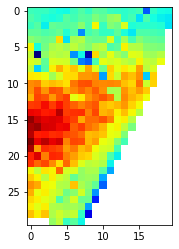

In [72]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [73]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values-360,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


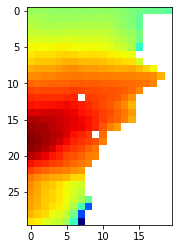

In [74]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

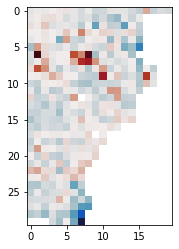

In [75]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-November

In [76]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre.head()

Intento fallido en Id: 6902654 Ciclo 1
Intento fallido en Id: 6900702 Ciclo 1
Intento fallido en Id: 6901506 Ciclo 1
Intento fallido en Id: 6900450 Ciclo 196
Intento fallido en Id: 6900450 Ciclo 197
Intento fallido en Id: 6900404 Ciclo 163
Intento fallido en Id: 6900404 Ciclo 162
Intento fallido en Id: 6900404 Ciclo 164
Intento fallido en Id: 6901414 Ciclo 1
Intento fallido en Id: 1900041 Ciclo 99
Intento fallido en Id: 1900041 Ciclo 98
Intento fallido en Id: 6900167 Ciclo 56
Intento fallido en Id: 6900167 Ciclo 55
Intento fallido en Id: 6900167 Ciclo 54
Intento fallido en Id: 1900572 Ciclo 5
Intento fallido en Id: 1900572 Ciclo 4
Intento fallido en Id: 1900572 Ciclo 3
Intento fallido en Id: 6901408 Ciclo 1
Intento fallido en Id: 6900402 Ciclo 53
Intento fallido en Id: 6900696 Ciclo 0
Intento fallido en Id: 6901003 Ciclo 1
Intento fallido en Id: 6900234 Ciclo 33
Intento fallido en Id: 6901416 Ciclo 1
Intento fallido en Id: 6900048 Ciclo 42
Intento fallido en Id: 6900048 Ciclo 41
Intent

,Lon,Lat,Presion_interp,S_interp
0,-24.9976,19.892,0,36.871162
1,-24.9976,19.892,1,36.613060
2,-24.9976,19.892,2,36.611887
3,-24.9976,19.892,3,36.611140
4,-24.9976,19.892,4,36.611000


In [77]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: total: 2.17 s
Wall time: 2.22 s


(30, 20)


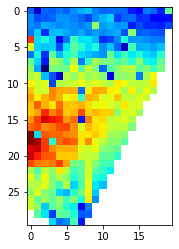

In [78]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [79]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values-360,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


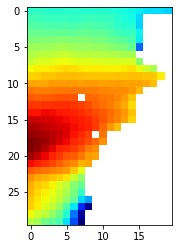

In [80]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

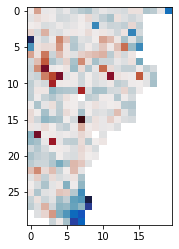

In [81]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-December

In [82]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre.head()

Intento fallido en Id: 6900404 Ciclo 167
Intento fallido en Id: 6900404 Ciclo 166
Intento fallido en Id: 6900404 Ciclo 165
Intento fallido en Id: 6900209 Ciclo 37
Intento fallido en Id: 3901972 Ciclo 1
Intento fallido en Id: 1900572 Ciclo 6
Intento fallido en Id: 1900572 Ciclo 7
Intento fallido en Id: 1900572 Ciclo 8
Intento fallido en Id: 6900402 Ciclo 56
Intento fallido en Id: 6900402 Ciclo 55
Intento fallido en Id: 6900167 Ciclo 59
Intento fallido en Id: 6900167 Ciclo 57
Intento fallido en Id: 6900167 Ciclo 58
Intento fallido en Id: 6900178 Ciclo 91
Intento fallido en Id: 6900178 Ciclo 92
Intento fallido en Id: 6900411 Ciclo 166
Intento fallido en Id: 6900234 Ciclo 1
Intento fallido en Id: 6900048 Ciclo 44
Intento fallido en Id: 6900163 Ciclo 21
Intento fallido en Id: 6900163 Ciclo 22
Intento fallido en Id: 6900163 Ciclo 23
Intento fallido en Id: 6900137 Ciclo 17
Intento fallido en Id: 6900162 Ciclo 41
Intento fallido en Id: 6900162 Ciclo 42
Intento fallido en Id: 6900162 Ciclo 77
I

,Lon,Lat,Presion_interp,S_interp
0,-24.99,31.231,0,35.670296
1,-24.99,31.231,1,35.673972
2,-24.99,31.231,2,35.677649
3,-24.99,31.231,3,35.681325
4,-24.99,31.231,4,35.685001


In [83]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(-25+0.5,-5+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(15+0.5, 45+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: total: 2.02 s
Wall time: 2.17 s


(30, 20)


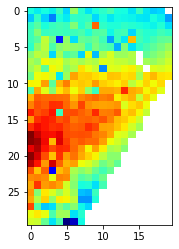

In [84]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [85]:
x1= np.arange(-25+0.5, -5+0.5,1)
y1= list(np.arange(15+0.5, 45+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values-360,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


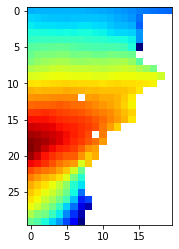

In [86]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

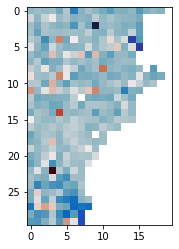

In [87]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Taylor Diagram

In [88]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [89]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.914880,0.803252,0.606696,January
1,1.029111,0.913013,0.425035,February
2,1.041077,0.911819,0.430791,March
3,0.981749,0.900582,0.442203,April
4,0.993389,0.900163,0.445594,May
5,0.889065,0.813403,0.588881,June
6,0.897709,0.829178,0.564313,July
7,0.930987,0.856332,0.522666,August
8,0.880335,0.872719,0.488458,September
9,0.946305,0.830576,0.568827,October


In [90]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Canarias/"
dfr.to_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Canarias.csv',index=False)

In [91]:
from taylorDiagram_mod import TaylorDiagram as TaDiM
dfr=pd.read_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Canarias.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']

Text(1.0, 0.21, 'RMSE')

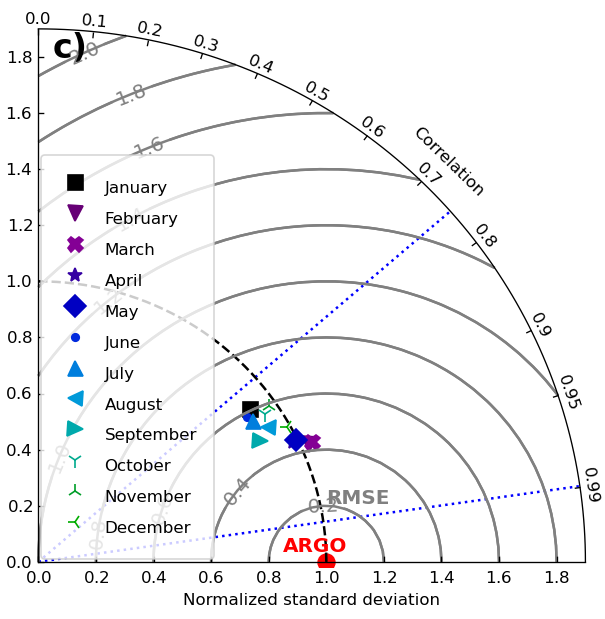

In [92]:
import numpy as NP
#figID_Taylor = plt.figure(num=25, dpi=240)
#figID_Taylor.set_size_inches(6., 6.)
figID_Taylor = plt.figure(num=20, dpi=120)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'c)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

## Spatial comparison

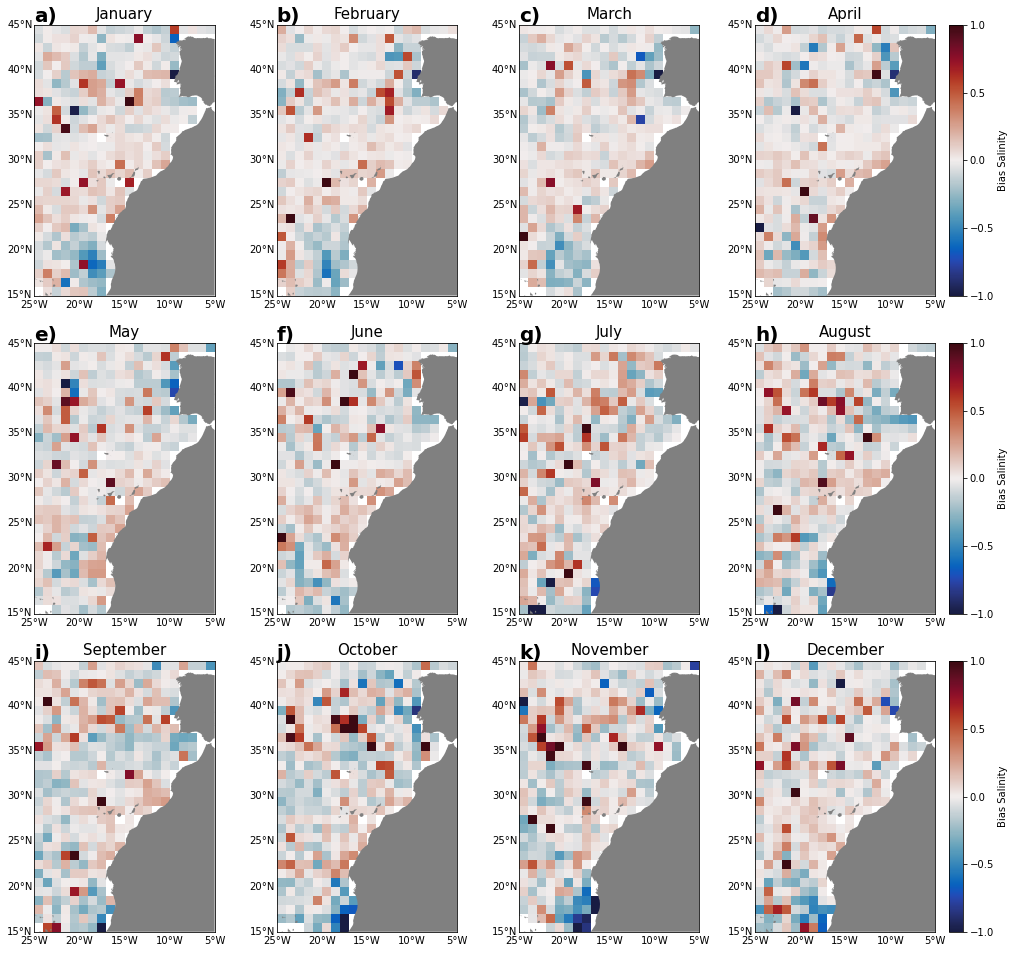

In [94]:
import string
x1= np.arange(-25+0.5, -5+0.5,1);y1= list(np.arange(15+0.5,45+0.5,1));y1=y1[::-1];y1= np.array(y1);
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(15,46,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-25,-20,-15,-10,-5],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)

# Benguela

## Read raw data (ARGO)

In [218]:
%cd "E:/Validation_EBUS_DavidBU/Argo data download/Benguela/Core/"

E:\Validation_EBUS_DavidBU\Argo data download\Benguela\Core


In [219]:
import datetime as dt
ds_final=pd.read_csv('df_T_S_final.csv',sep=',')
ds_final['Fecha']=pd.to_datetime(ds_final['Fecha'])
ds_final['Year']= ds_final['Fecha'].dt.year
ds_final['Month']= ds_final['Fecha'].dt.month
ds_final['Day']= ds_final['Fecha'].dt.day
print(ds_final.shape)
ds_final.head()

(4254725, 19)


,Fecha,Lon,Lat,Pres,Pres_Adj,Temp,Temp_Adj,Sal,Sal_Adj,Ciclo,Id,time_x,Lon_x,Lat_x,Cyc_x,Id_x,Year,Month,Day
0,2002-05-13 04:26:31,14.162,-31.226,10.0,10.0,19.056000,19.056000,35.703999,35.704460,1,5900134,NaN,NaN,NaN,NaN,NaN,2002,5,13
1,2002-05-13 04:26:31,14.162,-31.226,20.0,20.0,19.007999,19.007999,35.706001,35.706120,1,5900134,NaN,NaN,NaN,NaN,NaN,2002,5,13
2,2002-05-13 04:26:31,14.162,-31.226,30.0,30.0,19.002001,19.002001,35.708000,35.708099,1,5900134,NaN,NaN,NaN,NaN,NaN,2002,5,13
3,2002-05-13 04:26:31,14.162,-31.226,40.0,40.0,18.996000,18.996000,35.703999,35.704124,1,5900134,NaN,NaN,NaN,NaN,NaN,2002,5,13
4,2002-05-13 04:26:31,14.162,-31.226,50.0,50.0,18.990000,18.990000,35.706001,35.706116,1,5900134,NaN,NaN,NaN,NaN,NaN,2002,5,13


In [220]:
print(ds_final.shape)
df_perfil= ds_final[['Fecha','Lon','Lat','Ciclo','Month']]
df_perfil = df_perfil.drop_duplicates(subset = ['Fecha','Lon','Lat','Ciclo','Month'])
print(df_perfil.shape)
df_perfil.head()

(4254725, 19)
(20555, 5)


,Fecha,Lon,Lat,Ciclo,Month
0,2002-05-13 04:26:31,14.162,-31.226000,1,5
19,2002-05-23 05:32:30,13.777,-30.617001,2,5
50,2002-06-02 05:01:06,13.338,-29.870001,3,6
84,2002-06-12 06:06:35,13.683,-29.656000,4,6
118,2002-06-22 05:34:55,14.230,-29.997000,5,6


In [221]:
# Count by month
for i in range(1,13,1):
  mes= df_perfil[df_perfil.Month == i]
  print('Mes: ',i, len(mes.Ciclo.unique()))

Mes:  1 266
Mes:  2 246
Mes:  3 255
Mes:  4 248
Mes:  5 246
Mes:  6 245
Mes:  7 251
Mes:  8 252
Mes:  9 257
Mes:  10 260
Mes:  11 265
Mes:  12 266


In [222]:
# Funcion para sacar el numero de perfiles por cada mes
import numpy as np
import matplotlib.pyplot as plt
def cantidad_perfiles_mes(data):
  x = data.Lon;y = data.Lat;
  # Creacion de la grilla
  gridx = np.arange(5,25+1,1) # valores de lon
  #print(gridx.shape);print(gridx);
  gridy = np.arange(-40,-10+1,1)
  #print(gridy.shape);print(gridy);
  grid, _, _ = np.histogram2d(x, y, bins=[gridx, gridy]);
  #print(grid.shape)
  # Ponerlo en el mismo sentido para que quede alineado con Chile
  grid1=np.flip(grid.T, axis=0) # Izquierda°-85W , derecha -70°W, arriba -15°S, abajo -45°S
  x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
  #print(x1.shape);print(y1.shape)
  # Reemplazar 0 por nan
  grid1[grid1 == 0] = np.nan
  return grid1

In [223]:
lista_conteos=[]
for j in range(1,13,1):
  lista_conteos.append(cantidad_perfiles_mes(df_perfil[df_perfil.Month == j]))

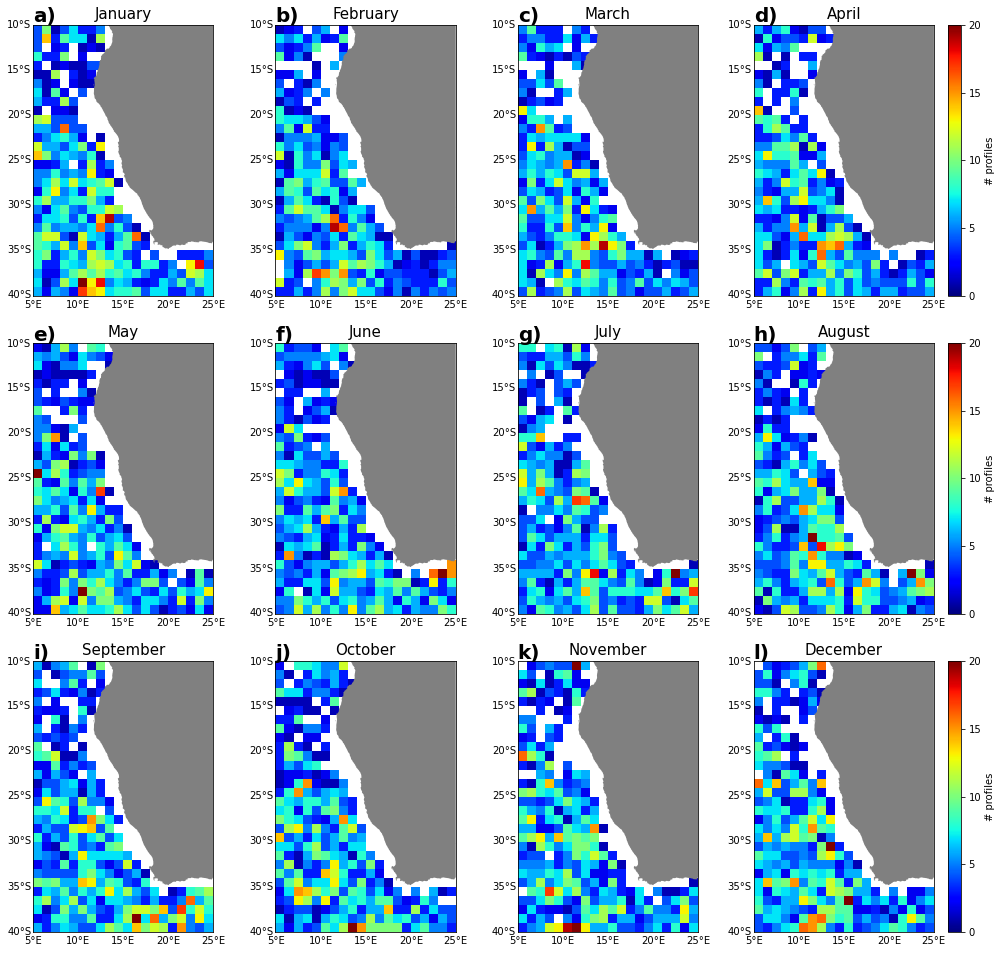

In [224]:
import string
ticks= np.array([0,5,10,15,20]) #labels para el colorbar
x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(len(lista_conteos))):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= lista_conteos[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap='jet',shading='flat',latlon=True,vmin=0, vmax=20)
  cs=m.pcolormesh(x1, y1, z,cmap='jet',latlon=True,vmin=0, vmax=20)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('# profiles', rotation=90)

## Read data from reanalysis

In [225]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Benguela/"
reanal=xr.open_dataset(ruta+'GLOBAL_REANALYSIS_PHY_SSS.nc').groupby("time.month").mean()
reanal

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.54 34.56 34.57 34.58 ... nan nan nan

In [227]:
p10 = reanal.SSS.quantile(0.1, dim='month')
p90 = reanal.SSS.quantile(0.9, dim='month')
# replace values above p90 or below p10 with median along the month dimension
median =reanal.SSS.median(dim='month')
reanal['SSS']= reanal.SSS.where((reanal.SSS <= p90) & (reanal.SSS >= p10), other=median)
reanal

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, month: 12)
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 0.5058
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    SSS      (month, lat, lon) float32 34.57 34.58 34.6 34.61 ... nan nan nan

**Filter 0 -100 dbar** (ARGO)

<AxesSubplot:>

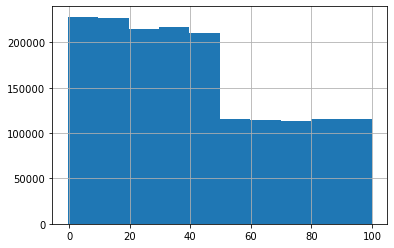

In [228]:
ds_final = ds_final[ds_final['Pres_Adj']< 100]
ds_final.Pres_Adj.hist()

In [229]:
# Group by and count
lista_dfs=[]
for i in range(12):
  mes_i= ds_final[ds_final.Month == i+1]
  mes_i=mes_i[['Lon','Lat','Pres_Adj','Sal_Adj','Ciclo','Id']].groupby(by=['Lon','Lat','Ciclo','Pres_Adj','Id']).mean()
  mes_i=mes_i.reset_index()
  print('Mes: ', i+1, '- Dimension:',mes_i.shape)
  lista_dfs.append(mes_i)

Mes:  1 - Dimension: (86119, 6)
Mes:  2 - Dimension: (69302, 6)
Mes:  3 - Dimension: (73780, 6)
Mes:  4 - Dimension: (83818, 6)
Mes:  5 - Dimension: (84452, 6)
Mes:  6 - Dimension: (138072, 6)
Mes:  7 - Dimension: (122415, 6)
Mes:  8 - Dimension: (107268, 6)
Mes:  9 - Dimension: (110407, 6)
Mes:  10 - Dimension: (100109, 6)
Mes:  11 - Dimension: (91607, 6)
Mes:  12 - Dimension: (112530, 6)


## Example for one month (Vertical interpolation Akima)

------------------------------------
Id : 1900935
Ciclo 48 ......................... Check
Ciclo 49 ......................... Check


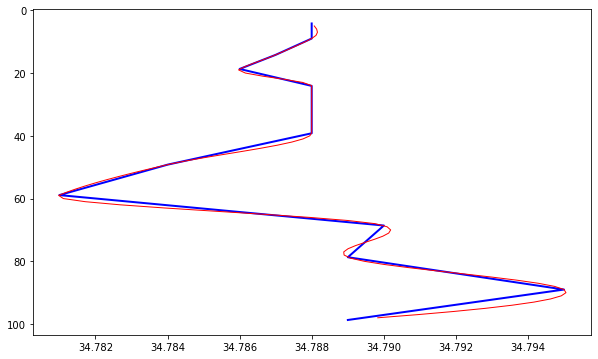

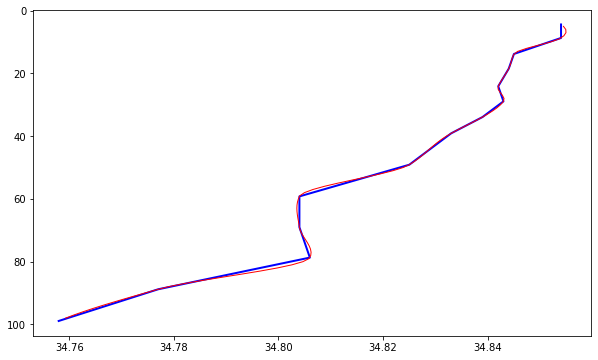

In [230]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
enero= lista_dfs[0]
############################################################################################################33
ids= list(enero.Id.unique()) # Ids unicos del dataframe
ciclos= list(enero.Ciclo.unique()) # ciclos unicos del dataframe
dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
# Creacion de ciclo for para hacer interpolacion
for i in ids[0:1]: # Iterar solo el primer elemento (al final seria 0:len(ids))
  print('------------------------------------')
  print('Id :',i)
  #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
  ciclos=enero[enero['Id']==i].Ciclo.unique()
  for j in ciclos[0:2]:
    print('Ciclo',j,'......................... Check')
    # Filtro del id y ciclo respectivo
    ds= enero[(enero['Id']==i) & (enero['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
    # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
    ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=100)] # Importante para que todos los valores queden entre 0 y 2000 dbar
    #print(ds) # Si se quiere ver el dataframe original
    # Extraer presion, temperatura y salinidad
    pres= ds.Pres_Adj; S= ds.Sal_Adj; # Variables locales otra vez
    # Objetos interpoladores de Salinidad y Temperatura
    # Caso 1: Spline (Espero que de mejor)
    spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
    # Ahora se hace la interpolacion entre el rango de valores de presion:
    min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
    # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
    pres_new= np.arange(min_pres,max_pres+1,1)
    # Interpolar T y S con (Metodo: Splines)
    S_new=spline_S(pres_new)
    #################################################################
    # Nueva grafica
    plt.figure(figsize=(10,6))
    plt.plot(ds.Sal_Adj,ds.Pres_Adj,color='b',linewidth=2)
    plt.plot(S_new,pres_new,color='r',linewidth=1)
    plt.gca().invert_yaxis()
    #################################################################
     # Crear el dataframe para cada perfil
    df_ts=pd.DataFrame();
    # Agregar lat y lon, id y ciclo automatica
    lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
    # Valores de 0 a 2000 dbar espaciados cada 1 dbar
    df_ts['Presion_interp']=np.arange(0,100+1,1)
    df_ts['Lon']= np.repeat(lon_0[0],101);df_ts['Lat']= np.repeat(lat_0[0],101)
    df_ts['Id']= np.repeat(id_0[0],101);df_ts['Ciclo']= np.repeat(ciclo_0[0],101);
    df_ts['S_interp']=np.nan; df_ts['S_interp'][min_pres:max_pres+1]= S_new;
    #print(df_ts)
    # Concatenar todos los dataframes en dfs
    dfs.append(df_ts)

## Function to generalize

In [231]:
import scipy.interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import Akima1DInterpolator
import math
import warnings
from itertools import repeat
warnings.filterwarnings("ignore") # Ignorar warnings
def interpolador_capas(dataframe, max_depth, intervalo):
  '''
  dataframe= pandas dataframe con columnas Lon, Lat,ciclo, Pres_adj, Id, Variable
  max_depth= valor entero de profundidad maxima a interpolar
  intervalo= intervalo de profundidad en m para interpolacion
  '''
  # Enfocarme en estas profundidades
  lista_prof = list(np.arange(0,max_depth+1,intervalo)) # Intervalos de 5m para extraer capas
  ############################################################################################################33
  ds_3D_m=dataframe
  ids= list(ds_3D_m.Id.unique()) # Ids unicos del dataframe
  ciclos= list(ds_3D_m.Ciclo.unique()) # ciclos unicos del dataframe
  dfs= [] # Lista donde voy a almacener cada uno de los dataframes resultantes de la interpolacion
  for i in ids: 
    # Iterar solo el primer elemento (al final seria 0:len(ids))
    #print('------------------------------------')
    #print('Id :',i,'................... Check')
    #print('Ciclos disponibles:', ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()) # Solo para ver los ciclos del primer id
    ciclos=ds_3D_m[ds_3D_m['Id']==i].Ciclo.unique()
    for j in ciclos:
      #print('Ciclo',j,'......................... Check')
      # Filtro del id y ciclo respectivo
      ds= ds_3D_m[(ds_3D_m['Id']==i) & (ds_3D_m['Ciclo']==j)] # Variable local (se sobre escribe cada vez)
      # Hacer el subset entre 0 y 2000 dbar para que no haya problemas de consistencia
      ds= ds[(ds['Pres_Adj']>=0) &(ds['Pres_Adj']<=max_depth)] # Importante para que todos los valores queden entre 0 y 2000 dbar
      # Extraer presion, temperatura y salinidad
      pres= ds.Pres_Adj;S= ds.Sal_Adj; # Variables locales otra vez
      # Objetos interpoladores de Salinidad y Temperatura
      # Caso 1: Spline (Espero que de mejor)
      try:
        spline_S= Akima1DInterpolator(pres,S) # Mejor metodo que encontre
        # Ahora se hace la interpolacion entre el rango de valores de presion:
        min_pres= math.floor(np.min(pres));max_pres= math.ceil(np.max(pres))
        # Crear la secuencia de valores entre el minimo y maximo encontrado en el perfil para interpolar
        pres_new= np.arange(min_pres,max_pres+1,1)
        S_new=spline_S(pres_new)# Interpolar T y S con (Metodo: Splines)
        df_ts=pd.DataFrame();# Crear el dataframe para cada perfil
        # Agregar lat y lon, id y ciclo automatica
        lat_0=ds.Lat.reset_index(drop=True);lon_0=ds.Lon.reset_index(drop=True);id_0=ds.Id.reset_index(drop=True);ciclo_0=ds.Ciclo.reset_index(drop=True)  
        df_ts['Presion_interp']=np.arange(0,max_depth+1,1)
        df_ts['Lon']= np.repeat(lon_0[0],max_depth+1);df_ts['Lat']= np.repeat(lat_0[0],max_depth+1)
        df_ts['Id']= np.repeat(id_0[0],max_depth+1);df_ts['Ciclo']= np.repeat(ciclo_0[0],max_depth+1);
        df_ts['S_interp']=np.nan;df_ts['S_interp'][min_pres:max_pres+1]= S_new;
        # Hacer el subset a las profundidades deseadas
        df_ts= df_ts[df_ts['Presion_interp'].isin(lista_prof)]
        dfs.append(df_ts)# Concatenar todos los dataframes en dfs
      except:
        print('Intento fallido en Id:',i, 'Ciclo',j)
        pass
  # Interpolar para llenar la capa superficial
  dfs_final=[]
  for i in dfs:
    try:
      data_f= i.interpolate(method='spline', order=1,limit_direction='backward')
      dfs_final.append(data_f)# Agregar los dataframes
    except:
      dfs_final.append(i)
  print('Tamaño de los dataframes generados :',len(dfs_final))
  df_final= pd.concat(dfs_final)
  # Agrupar por cada Lat, Lon y Presion sacando la media que no tiene en cuenta los nan
  df_final=df_final[['Presion_interp','Lon','Lat','S_interp']].groupby(by=['Lon','Lat','Presion_interp']).mean().reset_index()
  print(df_final.shape)
  return df_final

## Validation-January

In [232]:
enero= interpolador_capas(dataframe= lista_dfs[0], max_depth= 100, intervalo=1)
enero.head()

Intento fallido en Id: 3901964 Ciclo 46
Intento fallido en Id: 3901964 Ciclo 47
Intento fallido en Id: 3901964 Ciclo 48
Intento fallido en Id: 3901846 Ciclo 46
Intento fallido en Id: 3901846 Ciclo 47
Intento fallido en Id: 3901903 Ciclo 41
Intento fallido en Id: 3901903 Ciclo 40
Intento fallido en Id: 3901903 Ciclo 39
Intento fallido en Id: 1900110 Ciclo 44
Intento fallido en Id: 3901870 Ciclo 43
Intento fallido en Id: 3901870 Ciclo 44
Intento fallido en Id: 3901870 Ciclo 45
Intento fallido en Id: 3901901 Ciclo 41
Intento fallido en Id: 3901901 Ciclo 40
Intento fallido en Id: 3901901 Ciclo 39
Intento fallido en Id: 3901937 Ciclo 1
Intento fallido en Id: 3901935 Ciclo 1
Intento fallido en Id: 3901869 Ciclo 45
Intento fallido en Id: 3901869 Ciclo 43
Intento fallido en Id: 3901965 Ciclo 48
Intento fallido en Id: 3901965 Ciclo 46
Intento fallido en Id: 3901965 Ciclo 47
Intento fallido en Id: 6901582 Ciclo 280
Intento fallido en Id: 6901582 Ciclo 279
Intento fallido en Id: 6901582 Ciclo 275

,Lon,Lat,Presion_interp,S_interp
0,5.001,-38.867,0,34.784986
1,5.001,-38.867,1,34.785043
2,5.001,-38.867,2,34.785100
3,5.001,-38.867,3,34.785157
4,5.001,-38.867,4,34.785214


In [233]:
import scipy
from scipy.interpolate import griddata
ds_final= enero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jan = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur-Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jan.append(grid_z0_1)
datos_jan = np.stack(datos_jan)
#print(datos)
print(datos_jan.shape) 

(100, 30, 20)


(30, 20)


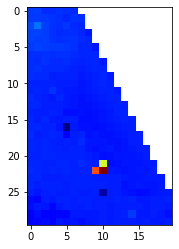

In [234]:
print(np.mean(datos_jan[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jan[0:2,:,:], axis=0),cmap='jet')

In [235]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jan=basemap.interp(datain=reanal.sel(month=1).SSS.values, xin=reanal.sel(month=1).lon.values,
                       yin=reanal.sel(month=1).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


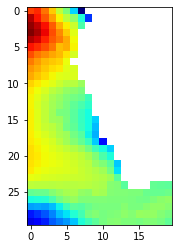

In [236]:
print(SST_jan.shape)
plt.imshow(SST_jan,cmap='jet')

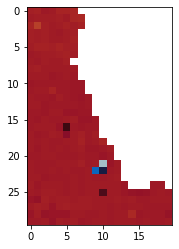

In [237]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jan-np.mean(datos_jan[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-February

In [238]:
febrero= interpolador_capas(dataframe= lista_dfs[1], max_depth= 100, intervalo=1)
febrero.head()

Intento fallido en Id: 3901870 Ciclo 46
Intento fallido en Id: 3901870 Ciclo 47
Intento fallido en Id: 3901870 Ciclo 48
Intento fallido en Id: 3901964 Ciclo 51
Intento fallido en Id: 3901964 Ciclo 49
Intento fallido en Id: 3901964 Ciclo 50
Intento fallido en Id: 3901901 Ciclo 42
Intento fallido en Id: 3901901 Ciclo 43
Intento fallido en Id: 3901901 Ciclo 44
Intento fallido en Id: 6901436 Ciclo 1
Intento fallido en Id: 3901903 Ciclo 44
Intento fallido en Id: 3901903 Ciclo 43
Intento fallido en Id: 3901903 Ciclo 42
Intento fallido en Id: 1901601 Ciclo 153
Intento fallido en Id: 6901582 Ciclo 292
Intento fallido en Id: 6901582 Ciclo 293
Intento fallido en Id: 6901582 Ciclo 291
Intento fallido en Id: 6901582 Ciclo 294
Intento fallido en Id: 6901582 Ciclo 288
Intento fallido en Id: 6901582 Ciclo 290
Intento fallido en Id: 6901582 Ciclo 289
Intento fallido en Id: 6901582 Ciclo 287
Intento fallido en Id: 6901582 Ciclo 284
Intento fallido en Id: 6901582 Ciclo 285
Intento fallido en Id: 6901582

,Lon,Lat,Presion_interp,S_interp
0,5.00822,-12.70731,0,36.647435
1,5.00822,-12.70731,1,36.632897
2,5.00822,-12.70731,2,36.450974
3,5.00822,-12.70731,3,36.452771
4,5.00822,-12.70731,4,36.451098


In [239]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= febrero #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_feb = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_feb.append(grid_z0_1)
datos_feb = np.stack(datos_feb)
#print(datos)
print(datos_feb.shape) 

(100, 30, 20)
CPU times: total: 1.66 s
Wall time: 2.87 s


(30, 20)


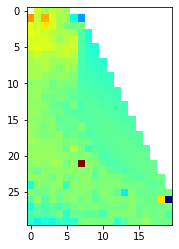

In [240]:
print(np.mean(datos_feb[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

In [241]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_feb=basemap.interp(datain=reanal.sel(month=2).SSS.values, xin=reanal.sel(month=2).lon.values,
                       yin=reanal.sel(month=2).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


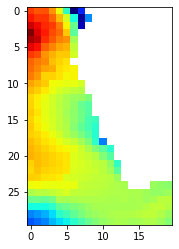

In [242]:
print(SST_feb.shape)
plt.imshow(SST_feb,cmap='jet')

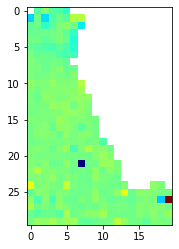

In [243]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_feb-np.mean(datos_feb[0:2,:,:], axis=0),cmap='jet')

## Validation-March

In [244]:
marzo= interpolador_capas(dataframe= lista_dfs[2], max_depth= 100, intervalo=1)
marzo.head()

Intento fallido en Id: 3901901 Ciclo 47
Intento fallido en Id: 3901901 Ciclo 46
Intento fallido en Id: 3901901 Ciclo 45
Intento fallido en Id: 3901964 Ciclo 52
Intento fallido en Id: 3901964 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 47
Intento fallido en Id: 3901903 Ciclo 46
Intento fallido en Id: 3901903 Ciclo 45
Intento fallido en Id: 6900727 Ciclo 119
Intento fallido en Id: 6900727 Ciclo 120
Intento fallido en Id: 4901225 Ciclo 255
Intento fallido en Id: 3901965 Ciclo 53
Intento fallido en Id: 3901965 Ciclo 52
Intento fallido en Id: 3901965 Ciclo 54
Intento fallido en Id: 6902605 Ciclo 1
Intento fallido en Id: 3901846 Ciclo 53
Intento fallido en Id: 3901846 Ciclo 52
Intento fallido en Id: 3901846 Ciclo 51
Intento fallido en Id: 3901670 Ciclo 27
Intento fallido en Id: 6901582 Ciclo 299
Intento fallido en Id: 6901582 Ciclo 297
Intento fallido en Id: 6901582 Ciclo 298
Intento fallido en Id: 6901582 Ciclo 300
Intento fallido en Id: 6901582 Ciclo 296
Intento fallido en Id: 6901582 Ci

,Lon,Lat,Presion_interp,S_interp
0,5.004,-30.559,0,35.775019
1,5.004,-30.559,1,35.772371
2,5.004,-30.559,2,35.769723
3,5.004,-30.559,3,35.767075
4,5.004,-30.559,4,35.764427


In [245]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= marzo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_mar = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_mar.append(grid_z0_1)
datos_mar = np.stack(datos_mar)
#print(datos)
print(datos_mar.shape) 

(100, 30, 20)
CPU times: total: 1.81 s
Wall time: 2.32 s


(30, 20)


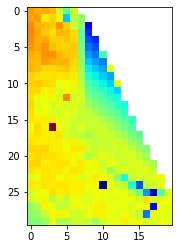

In [246]:
print(np.mean(datos_mar[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_mar[0:2,:,:], axis=0),cmap='jet')

In [247]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_mar=basemap.interp(datain=reanal.sel(month=3).SSS.values, xin=reanal.sel(month=3).lon.values,
                       yin=reanal.sel(month=3).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


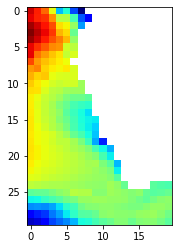

In [248]:
print(SST_mar.shape)
plt.imshow(SST_mar,cmap='jet')

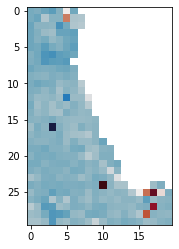

In [249]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_mar-np.mean(datos_mar[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-April

In [250]:
abril= interpolador_capas(dataframe= lista_dfs[3], max_depth= 100, intervalo=1)
abril.head()

Intento fallido en Id: 3901901 Ciclo 49
Intento fallido en Id: 3901901 Ciclo 50
Intento fallido en Id: 3901903 Ciclo 50
Intento fallido en Id: 3901903 Ciclo 49
Intento fallido en Id: 3901965 Ciclo 56
Intento fallido en Id: 3901965 Ciclo 57
Intento fallido en Id: 3901965 Ciclo 55
Intento fallido en Id: 3901964 Ciclo 55
Intento fallido en Id: 3901964 Ciclo 56
Intento fallido en Id: 3901964 Ciclo 57
Intento fallido en Id: 3901846 Ciclo 55
Intento fallido en Id: 3901846 Ciclo 56
Intento fallido en Id: 3901846 Ciclo 54
Intento fallido en Id: 6901582 Ciclo 301
Intento fallido en Id: 6901582 Ciclo 304
Intento fallido en Id: 6901582 Ciclo 305
Intento fallido en Id: 6901582 Ciclo 302
Intento fallido en Id: 6901582 Ciclo 303
Intento fallido en Id: 3901869 Ciclo 54
Intento fallido en Id: 3901869 Ciclo 53
Intento fallido en Id: 3901869 Ciclo 52
Intento fallido en Id: 3901847 Ciclo 56
Intento fallido en Id: 3901847 Ciclo 55
Intento fallido en Id: 6902721 Ciclo 130
Intento fallido en Id: 3901915 Cic

,Lon,Lat,Presion_interp,S_interp
0,5.01,-12.994,0,36.803939
1,5.01,-12.994,1,36.789731
2,5.01,-12.994,2,36.586998
3,5.01,-12.994,3,36.586997
4,5.01,-12.994,4,36.586998


In [251]:
%%time
import scipy
from scipy.interpolate import griddata
# Coordenadas para grafica
ds_final= abril #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_abr = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_abr.append(grid_z0_1)
datos_abr = np.stack(datos_abr)
#print(datos)
print(datos_abr.shape) 

(100, 30, 20)
CPU times: total: 1.5 s
Wall time: 2 s


(30, 20)


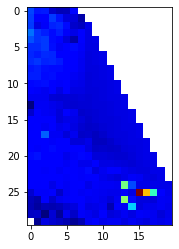

In [252]:
print(np.mean(datos_abr[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_abr[0:2,:,:], axis=0),cmap='jet')

In [253]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_abr=basemap.interp(datain=reanal.sel(month=4).SSS.values, xin=reanal.sel(month=4).lon.values,
                       yin=reanal.sel(month=4).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


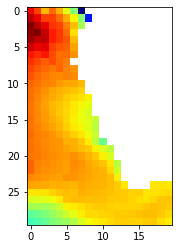

In [254]:
print(SST_abr.shape)
plt.imshow(SST_abr,cmap='jet')

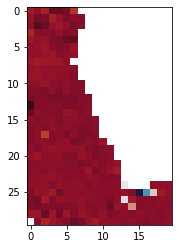

In [255]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_abr-np.mean(datos_abr[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-May

In [256]:
mayo= interpolador_capas(dataframe= lista_dfs[4], max_depth= 100, intervalo=1)
mayo.head()

Intento fallido en Id: 3901901 Ciclo 51
Intento fallido en Id: 3901901 Ciclo 52
Intento fallido en Id: 3901901 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 53
Intento fallido en Id: 3901903 Ciclo 52
Intento fallido en Id: 3901903 Ciclo 51
Intento fallido en Id: 3901915 Ciclo 83
Intento fallido en Id: 3901915 Ciclo 82
Intento fallido en Id: 3901915 Ciclo 81
Intento fallido en Id: 3901964 Ciclo 60
Intento fallido en Id: 3901964 Ciclo 59
Intento fallido en Id: 3901964 Ciclo 58
Intento fallido en Id: 3901965 Ciclo 58
Intento fallido en Id: 3901965 Ciclo 59
Intento fallido en Id: 3901965 Ciclo 60
Intento fallido en Id: 3901846 Ciclo 59
Intento fallido en Id: 3901846 Ciclo 58
Intento fallido en Id: 3901846 Ciclo 57
Intento fallido en Id: 3901869 Ciclo 57
Intento fallido en Id: 3901869 Ciclo 56
Intento fallido en Id: 3901869 Ciclo 55
Intento fallido en Id: 6901582 Ciclo 307
Intento fallido en Id: 6901582 Ciclo 309
Intento fallido en Id: 6901582 Ciclo 308
Intento fallido en Id: 6901492 Ciclo 

,Lon,Lat,Presion_interp,S_interp
0,4.99978,-15.232,0,36.607462
1,4.99978,-15.232,1,36.592806
2,4.99978,-15.232,2,36.363823
3,4.99978,-15.232,3,36.364226
4,4.99978,-15.232,4,36.364080


In [257]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= mayo #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_may = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_may.append(grid_z0_1)
datos_may = np.stack(datos_may)
#print(datos)
print(datos_may.shape) 

(100, 30, 20)
CPU times: total: 1.52 s
Wall time: 2.03 s


(30, 20)


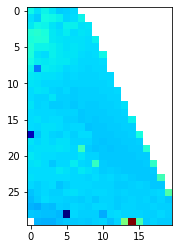

In [258]:
print(np.mean(datos_may[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_may[0:2,:,:], axis=0),cmap='jet')

In [259]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_may=basemap.interp(datain=reanal.sel(month=5).SSS.values, xin=reanal.sel(month=5).lon.values,
                       yin=reanal.sel(month=5).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


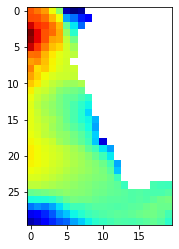

In [260]:
print(SST_may.shape)
plt.imshow(SST_may,cmap='jet')

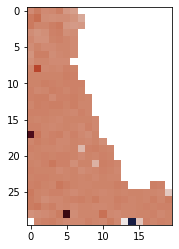

In [261]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_may-np.mean(datos_may[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-June

In [262]:
junio= interpolador_capas(dataframe= lista_dfs[5], max_depth= 100, intervalo=1)
junio.head()

Intento fallido en Id: 3901915 Ciclo 85
Intento fallido en Id: 3901915 Ciclo 84
Intento fallido en Id: 3901903 Ciclo 54
Intento fallido en Id: 3901903 Ciclo 55
Intento fallido en Id: 3901903 Ciclo 56
Intento fallido en Id: 1900110 Ciclo 24
Intento fallido en Id: 3901901 Ciclo 55
Intento fallido en Id: 3901901 Ciclo 54
Intento fallido en Id: 3901901 Ciclo 56
Intento fallido en Id: 3901869 Ciclo 59
Intento fallido en Id: 3901869 Ciclo 58
Intento fallido en Id: 3901964 Ciclo 63
Intento fallido en Id: 3901964 Ciclo 61
Intento fallido en Id: 3901964 Ciclo 62
Intento fallido en Id: 3901846 Ciclo 60
Intento fallido en Id: 3901846 Ciclo 61
Intento fallido en Id: 3901846 Ciclo 62
Intento fallido en Id: 3901847 Ciclo 60
Intento fallido en Id: 3901847 Ciclo 61
Intento fallido en Id: 3901847 Ciclo 62
Intento fallido en Id: 3901870 Ciclo 60
Intento fallido en Id: 3901870 Ciclo 59
Intento fallido en Id: 3901870 Ciclo 58
Intento fallido en Id: 3901671 Ciclo 1
Intento fallido en Id: 6902721 Ciclo 136


,Lon,Lat,Presion_interp,S_interp
0,5.008,-27.031,0,35.656074
1,5.008,-27.031,1,35.656108
2,5.008,-27.031,2,35.656143
3,5.008,-27.031,3,35.656177
4,5.008,-27.031,4,35.656212


In [263]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= junio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jun = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jun.append(grid_z0_1)
datos_jun = np.stack(datos_jun)
#print(datos)
print(datos_jun.shape) 

(100, 30, 20)
CPU times: total: 1.47 s
Wall time: 1.55 s


(30, 20)


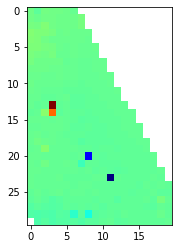

In [264]:
print(np.mean(datos_jun[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jun[0:2,:,:], axis=0),cmap='jet')

In [265]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jun=basemap.interp(datain=reanal.sel(month=6).SSS.values, xin=reanal.sel(month=6).lon.values,
                       yin=reanal.sel(month=6).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


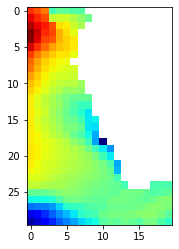

In [266]:
print(SST_jun.shape)
plt.imshow(SST_jun,cmap='jet')

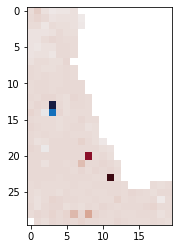

In [267]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jun-np.mean(datos_jun[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-July

In [268]:
julio= interpolador_capas(dataframe= lista_dfs[6], max_depth= 100, intervalo=1)
julio.head()

Intento fallido en Id: 1901601 Ciclo 171
Intento fallido en Id: 3901903 Ciclo 57
Intento fallido en Id: 3901903 Ciclo 58
Intento fallido en Id: 3901903 Ciclo 59
Intento fallido en Id: 3901903 Ciclo 60
Intento fallido en Id: 3901901 Ciclo 57
Intento fallido en Id: 3901901 Ciclo 58
Intento fallido en Id: 3901901 Ciclo 59
Intento fallido en Id: 3901869 Ciclo 63
Intento fallido en Id: 3901869 Ciclo 62
Intento fallido en Id: 3901869 Ciclo 61
Intento fallido en Id: 3901964 Ciclo 65
Intento fallido en Id: 3901964 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 64
Intento fallido en Id: 3901847 Ciclo 65
Intento fallido en Id: 3901847 Ciclo 63
Intento fallido en Id: 3901847 Ciclo 64
Intento fallido en Id: 3901846 Ciclo 63
Intento fallido en Id: 3901846 Ciclo 64
Intento fallido en Id: 3901846 Ciclo 65
Intento fallido en Id: 6902721 Ciclo 137
Intento fallido en Id: 6902721 Ciclo 138
Intento fallido en Id: 6902721 Ciclo 139
Intento fallido en Id: 3901870 Ciclo 61
Intento fallido en Id: 3901870 Ciclo

,Lon,Lat,Presion_interp,S_interp
0,5.002,-30.197,0,35.760514
1,5.002,-30.197,1,35.759181
2,5.002,-30.197,2,35.757849
3,5.002,-30.197,3,35.756516
4,5.002,-30.197,4,35.755184


In [269]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= julio #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_jul = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_jul.append(grid_z0_1)
datos_jul = np.stack(datos_jul)
#print(datos)
print(datos_jul.shape) 

(100, 30, 20)
CPU times: total: 1.62 s
Wall time: 1.78 s


(30, 20)


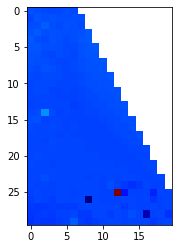

In [270]:
print(np.mean(datos_jul[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_jul[0:2,:,:], axis=0),cmap='jet')

In [271]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_jul=basemap.interp(datain=reanal.sel(month=7).SSS.values, xin=reanal.sel(month=7).lon.values,
                       yin=reanal.sel(month=7).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


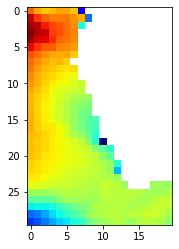

In [272]:
print(SST_jul.shape)
plt.imshow(SST_jul,cmap='jet')

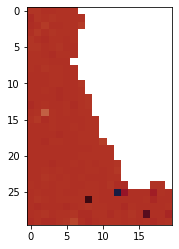

In [273]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_jul-np.mean(datos_jul[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-August

In [274]:
agosto= interpolador_capas(dataframe= lista_dfs[7], max_depth= 100, intervalo=1)
agosto.head()

Intento fallido en Id: 1900387 Ciclo 0
Intento fallido en Id: 1901052 Ciclo 35
Intento fallido en Id: 1900392 Ciclo 0
Intento fallido en Id: 1901618 Ciclo 63
Intento fallido en Id: 1900384 Ciclo 0
Intento fallido en Id: 3901869 Ciclo 66
Intento fallido en Id: 3901869 Ciclo 65
Intento fallido en Id: 3901869 Ciclo 64
Intento fallido en Id: 3901901 Ciclo 61
Intento fallido en Id: 3901901 Ciclo 62
Intento fallido en Id: 3901901 Ciclo 63
Intento fallido en Id: 3901847 Ciclo 66
Intento fallido en Id: 3901847 Ciclo 67
Intento fallido en Id: 3901847 Ciclo 68
Intento fallido en Id: 3901846 Ciclo 68
Intento fallido en Id: 3901846 Ciclo 67
Intento fallido en Id: 3901846 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 68
Intento fallido en Id: 3901964 Ciclo 67
Intento fallido en Id: 3901964 Ciclo 69
Intento fallido en Id: 6901582 Ciclo 316
Intento fallido en Id: 6901582 Ciclo 317
Intento fallido en Id: 6901582 Ciclo 318
Intento fallido en Id: 3901903 Ciclo 61
Intento fallido en Id: 3901903 Ciclo 62


,Lon,Lat,Presion_interp,S_interp
0,5.0,-37.729,0,34.654924
1,5.0,-37.729,1,34.653812
2,5.0,-37.729,2,34.652700
3,5.0,-37.729,3,34.651588
4,5.0,-37.729,4,34.650476


In [275]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= agosto #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_ago = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_ago.append(grid_z0_1)
datos_ago = np.stack(datos_ago)
#print(datos)
print(datos_ago.shape) 

(100, 30, 20)
CPU times: total: 1.64 s
Wall time: 1.77 s


(30, 20)


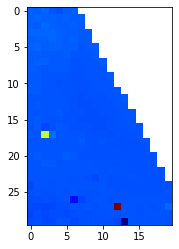

In [276]:
print(np.mean(datos_ago[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_ago[0:2,:,:], axis=0),cmap='jet')

In [277]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_ago=basemap.interp(datain=reanal.sel(month=8).SSS.values, xin=reanal.sel(month=8).lon.values,
                       yin=reanal.sel(month=8).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


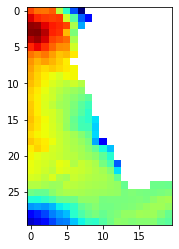

In [278]:
print(SST_ago.shape)
plt.imshow(SST_ago,cmap='jet')

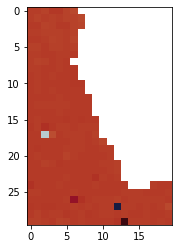

In [279]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_ago-np.mean(datos_ago[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-September

In [280]:
septiembre= interpolador_capas(dataframe= lista_dfs[8], max_depth= 100, intervalo=1)
septiembre.head()

Intento fallido en Id: 3901915 Ciclo 94
Intento fallido en Id: 3901915 Ciclo 95
Intento fallido en Id: 6902835 Ciclo 1
Intento fallido en Id: 6901500 Ciclo 1
Intento fallido en Id: 3901901 Ciclo 64
Intento fallido en Id: 3901901 Ciclo 65
Intento fallido en Id: 3901901 Ciclo 66
Intento fallido en Id: 3901964 Ciclo 72
Intento fallido en Id: 3901964 Ciclo 70
Intento fallido en Id: 3901869 Ciclo 69
Intento fallido en Id: 3901869 Ciclo 68
Intento fallido en Id: 3901869 Ciclo 67
Intento fallido en Id: 6901020 Ciclo 1
Intento fallido en Id: 6902834 Ciclo 1
Intento fallido en Id: 3901847 Ciclo 69
Intento fallido en Id: 3901847 Ciclo 70
Intento fallido en Id: 3901847 Ciclo 71
Intento fallido en Id: 3901870 Ciclo 69
Intento fallido en Id: 3901870 Ciclo 68
Intento fallido en Id: 3901870 Ciclo 67
Intento fallido en Id: 3901846 Ciclo 71
Intento fallido en Id: 3901846 Ciclo 70
Intento fallido en Id: 3901846 Ciclo 69
Intento fallido en Id: 6902721 Ciclo 145
Intento fallido en Id: 6902721 Ciclo 143
In

,Lon,Lat,Presion_interp,S_interp
0,5.004,-34.539,0,35.462006
1,5.004,-34.539,1,35.462049
2,5.004,-34.539,2,35.462093
3,5.004,-34.539,3,35.462136
4,5.004,-34.539,4,35.463001


In [281]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= septiembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_sep = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_sep.append(grid_z0_1)
datos_sep = np.stack(datos_sep)
#print(datos)
print(datos_sep.shape) 

(100, 30, 20)
CPU times: total: 1.48 s
Wall time: 1.56 s


(30, 20)


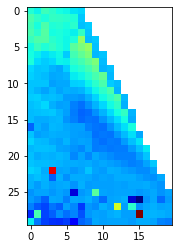

In [282]:
print(np.mean(datos_sep[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_sep[0:2,:,:], axis=0),cmap='jet')

In [283]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_sep=basemap.interp(datain=reanal.sel(month=9).SSS.values, xin=reanal.sel(month=9).lon.values,
                       yin=reanal.sel(month=9).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


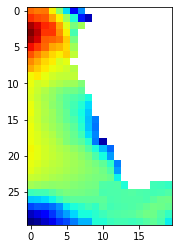

In [284]:
print(SST_sep.shape)
plt.imshow(SST_sep,cmap='jet')

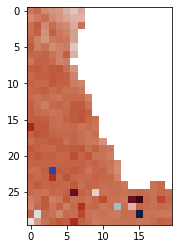

In [285]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_sep-np.mean(datos_sep[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-October

In [286]:
octubre= interpolador_capas(dataframe= lista_dfs[9], max_depth= 100, intervalo=1)
octubre.head()

Intento fallido en Id: 3901915 Ciclo 96
Intento fallido en Id: 1900918 Ciclo 0
Intento fallido en Id: 3901901 Ciclo 67
Intento fallido en Id: 3901901 Ciclo 68
Intento fallido en Id: 3901901 Ciclo 69
Intento fallido en Id: 3901869 Ciclo 72
Intento fallido en Id: 3901869 Ciclo 71
Intento fallido en Id: 3901869 Ciclo 70
Intento fallido en Id: 3901964 Ciclo 73
Intento fallido en Id: 3901964 Ciclo 75
Intento fallido en Id: 3901847 Ciclo 72
Intento fallido en Id: 3901847 Ciclo 73
Intento fallido en Id: 3901847 Ciclo 74
Intento fallido en Id: 3901903 Ciclo 69
Intento fallido en Id: 3901903 Ciclo 68
Intento fallido en Id: 3901903 Ciclo 67
Intento fallido en Id: 3901870 Ciclo 70
Intento fallido en Id: 3901870 Ciclo 72
Intento fallido en Id: 3901870 Ciclo 71
Intento fallido en Id: 3901846 Ciclo 74
Intento fallido en Id: 3901846 Ciclo 72
Intento fallido en Id: 3901846 Ciclo 73
Intento fallido en Id: 3901846 Ciclo 1
Intento fallido en Id: 1900919 Ciclo 0
Intento fallido en Id: 6902721 Ciclo 148
In

,Lon,Lat,Presion_interp,S_interp
0,5.0,-11.221,0,36.465763
1,5.0,-11.221,1,36.453612
2,5.0,-11.221,2,36.441460
3,5.0,-11.221,3,36.429308
4,5.0,-11.221,4,36.417157


In [287]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= octubre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_oct = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_oct.append(grid_z0_1)
datos_oct = np.stack(datos_oct)
#print(datos)
print(datos_oct.shape) 

(100, 30, 20)
CPU times: total: 1.36 s
Wall time: 1.51 s


(30, 20)


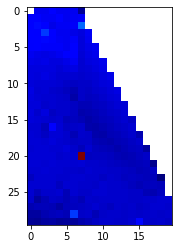

In [288]:
print(np.mean(datos_oct[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_oct[0:2,:,:], axis=0),cmap='jet')

In [289]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_oct=basemap.interp(datain=reanal.sel(month=10).SSS.values, xin=reanal.sel(month=10).lon.values,
                       yin=reanal.sel(month=10).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


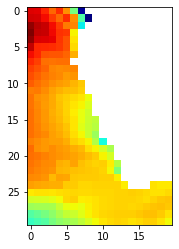

In [290]:
print(SST_oct.shape)
plt.imshow(SST_oct,cmap='jet')

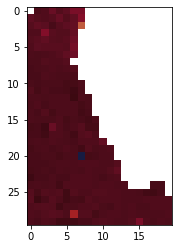

In [291]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_oct-np.mean(datos_oct[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-November

In [292]:
noviembre= interpolador_capas(dataframe= lista_dfs[10], max_depth= 100, intervalo=1)
noviembre.head()

Intento fallido en Id: 6900707 Ciclo 1
Intento fallido en Id: 3901901 Ciclo 70
Intento fallido en Id: 3901901 Ciclo 71
Intento fallido en Id: 3901901 Ciclo 72
Intento fallido en Id: 3901964 Ciclo 78
Intento fallido en Id: 3901964 Ciclo 76
Intento fallido en Id: 3901964 Ciclo 77
Intento fallido en Id: 3901869 Ciclo 73
Intento fallido en Id: 3901869 Ciclo 75
Intento fallido en Id: 3901869 Ciclo 1
Intento fallido en Id: 3901869 Ciclo 2
Intento fallido en Id: 6902631 Ciclo 1
Intento fallido en Id: 3901903 Ciclo 72
Intento fallido en Id: 3901903 Ciclo 70
Intento fallido en Id: 3901903 Ciclo 71
Intento fallido en Id: 3901847 Ciclo 75
Intento fallido en Id: 3901847 Ciclo 76
Intento fallido en Id: 3901847 Ciclo 77
Intento fallido en Id: 3901846 Ciclo 77
Intento fallido en Id: 3901846 Ciclo 76
Intento fallido en Id: 3901846 Ciclo 75
Intento fallido en Id: 3901846 Ciclo 4
Intento fallido en Id: 3901846 Ciclo 3
Intento fallido en Id: 3901846 Ciclo 2
Intento fallido en Id: 3901870 Ciclo 75
Intento

,Lon,Lat,Presion_interp,S_interp
0,5.036,-26.514,0,35.842792
1,5.036,-26.514,1,35.841644
2,5.036,-26.514,2,35.840495
3,5.036,-26.514,3,35.839346
4,5.036,-26.514,4,35.838198


In [293]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= noviembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_nov = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_nov.append(grid_z0_1)
datos_nov = np.stack(datos_nov)
#print(datos)
print(datos_nov.shape) 

(100, 30, 20)
CPU times: total: 1.28 s
Wall time: 1.5 s


(30, 20)


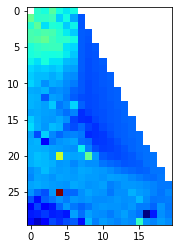

In [294]:
print(np.mean(datos_nov[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_nov[0:2,:,:], axis=0),cmap='jet')

In [295]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_nov=basemap.interp(datain=reanal.sel(month=11).SSS.values, xin=reanal.sel(month=11).lon.values,
                       yin=reanal.sel(month=11).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


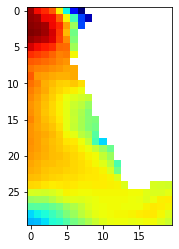

In [296]:
print(SST_nov.shape)
plt.imshow(SST_nov,cmap='jet')

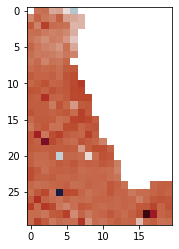

In [297]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_nov-np.mean(datos_nov[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Validation-December

In [298]:
diciembre= interpolador_capas(dataframe= lista_dfs[11], max_depth= 100, intervalo=1)
diciembre.head()

Intento fallido en Id: 3901846 Ciclo 80
Intento fallido en Id: 3901846 Ciclo 79
Intento fallido en Id: 3901846 Ciclo 78
Intento fallido en Id: 3901846 Ciclo 5
Intento fallido en Id: 3901846 Ciclo 6
Intento fallido en Id: 3901846 Ciclo 7
Intento fallido en Id: 3901903 Ciclo 75
Intento fallido en Id: 3901903 Ciclo 74
Intento fallido en Id: 3901903 Ciclo 73
Intento fallido en Id: 3901903 Ciclo 2
Intento fallido en Id: 3901903 Ciclo 1
Intento fallido en Id: 3901964 Ciclo 79
Intento fallido en Id: 3901964 Ciclo 81
Intento fallido en Id: 3901964 Ciclo 80
Intento fallido en Id: 5902281 Ciclo 0
Intento fallido en Id: 3901901 Ciclo 73
Intento fallido en Id: 3901901 Ciclo 2
Intento fallido en Id: 3901901 Ciclo 74
Intento fallido en Id: 3901901 Ciclo 75
Intento fallido en Id: 3901901 Ciclo 1
Intento fallido en Id: 6900728 Ciclo 0
Intento fallido en Id: 6900727 Ciclo 0
Intento fallido en Id: 3901869 Ciclo 76
Intento fallido en Id: 3901869 Ciclo 77
Intento fallido en Id: 3901869 Ciclo 5
Intento fal

,Lon,Lat,Presion_interp,S_interp
0,5.005,-27.089,0,35.756691
1,5.005,-27.089,1,35.754441
2,5.005,-27.089,2,35.752190
3,5.005,-27.089,3,35.749940
4,5.005,-27.089,4,35.747689


In [299]:
%%time
import scipy
from scipy.interpolate import griddata
ds_final= diciembre #pasar los resultados del dataframe anteriores
# Lista para ir guardando cada matrix latxlon
datos_dic = []
for i in ds_final.Presion_interp.unique()[:-1]: # voy de 5m en adelante
  capa_x=ds_final[ds_final['Presion_interp']==i]
  # Grilla generica
  gridx = np.arange(5+0.5,25+0.5,1)# np.arange(-85,-70+1,1)
  gridy = np.arange(-40+0.5, -10+0.5,1)#np.arange(-45, -15+1,1)
  grid_x, grid_y =scipy.meshgrid(gridx,gridy)
  points =np.array(capa_x[['Lon','Lat']])
  values=np.array(capa_x['S_interp'])
  # Interpoladores
  grid_z0=griddata(points,values, (grid_x,grid_y),method='linear')
  # Rotacion en el eje y Sur -Norte
  grid_z0_1=np.flip(grid_z0, axis=0)
  #print(grid_z0_1.shape)# Esto no es necesario despues
  datos_dic.append(grid_z0_1)
datos_dic = np.stack(datos_dic)
#print(datos)
print(datos_dic.shape) 

(100, 30, 20)
CPU times: total: 1.62 s
Wall time: 1.81 s


(30, 20)


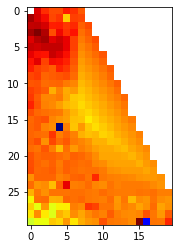

In [300]:
print(np.mean(datos_dic[0:2,:,:], axis=0).shape)
plt.imshow(np.mean(datos_dic[0:2,:,:], axis=0),cmap='jet')

In [301]:
x1= np.arange(5+0.5, 25+0.5,1)
y1= list(np.arange(-40+0.5, -10+0.5,1));y1=y1[::-1];y1= np.array(y1)
X_t, Y_t= np.meshgrid(x1,y1)
SST_dic=basemap.interp(datain=reanal.sel(month=12).SSS.values, xin=reanal.sel(month=12).lon.values,
                       yin=reanal.sel(month=12).lat.values,xout=X_t, yout=Y_t, order=1, masked= True)

(30, 20)


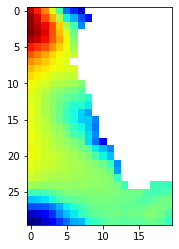

In [302]:
print(SST_dic.shape)
plt.imshow(SST_dic,cmap='jet')

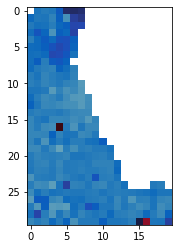

In [303]:
# Diferencia entre modelo y ARGO
plt.imshow(SST_dic-np.mean(datos_dic[0:2,:,:], axis=0),cmap=cmocean.cm.balance)

## Taylor Diagram

In [304]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [305]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.133067,0.160893,0.995804,January
1,0.553001,0.644634,0.791411,February
2,0.379124,0.498410,0.876653,March
3,0.315775,0.274752,0.985772,April
4,0.260984,0.202294,0.988665,May
5,0.157339,0.203108,0.982200,June
6,0.101007,0.093574,0.997526,July
7,0.092743,0.085428,0.999802,August
8,0.557776,0.476210,0.913782,September
9,0.309248,0.258502,0.979400,October


In [306]:
ruta="E:/Validation_EBUS_DavidBU/SSS_data/Benguela/"
dfr.to_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Benguela.csv',index=False)

In [307]:
from taylorDiagram_mod import TaylorDiagram as TaDiM
dfr=pd.read_csv(ruta+'Datos_Taylor_Validacion_Salinidad_Benguela.csv')
STD_m =list(dfr.STD)
CORRCOEF =list(dfr.CORR)
RMSE=list(dfr.RMSE)
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
dfr

,STD,CORR,RMSE,Mes
0,0.133067,0.160893,0.995804,January
1,0.553001,0.644634,0.791411,February
2,0.379124,0.498410,0.876653,March
3,0.315775,0.274752,0.985772,April
4,0.260984,0.202294,0.988665,May
5,0.157339,0.203108,0.982200,June
6,0.101007,0.093574,0.997526,July
7,0.092743,0.085428,0.999802,August
8,0.557776,0.476210,0.913782,September
9,0.309248,0.258502,0.979400,October


Text(1.0, 0.21, 'RMSE')

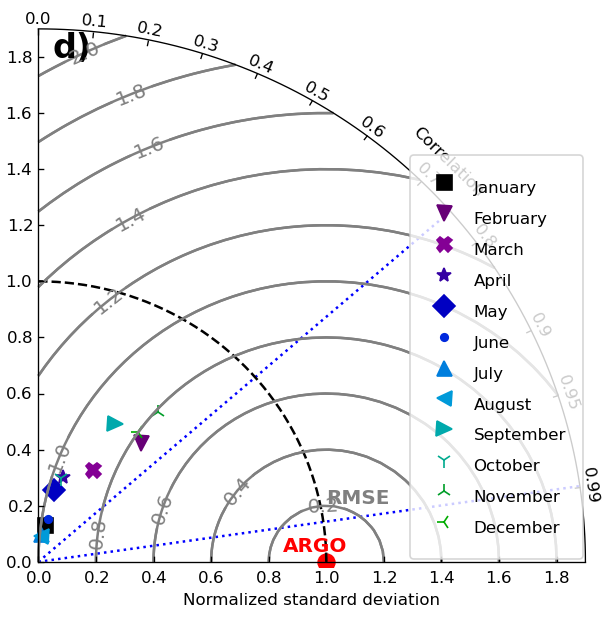

In [308]:
import numpy as NP
#figID_Taylor = plt.figure(num=25, dpi=240)
#figID_Taylor.set_size_inches(6., 6.)
figID_Taylor = plt.figure(num=20, dpi=120)
figID_Taylor.set_size_inches(6., 6.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.9), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=9)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.25**2)],[0,1.25], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.27**2)],[0,0.27], color='blue',linestyle=':') # correlacion 0.99
TayDia.ax.clabel(contours, inline=1, fontsize=12, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='medium'), loc='lower right', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold',fontsize=12)
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.8,'d)', color='black',weight='bold', fontsize=20)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold',fontsize=12)

## Spatial comparison

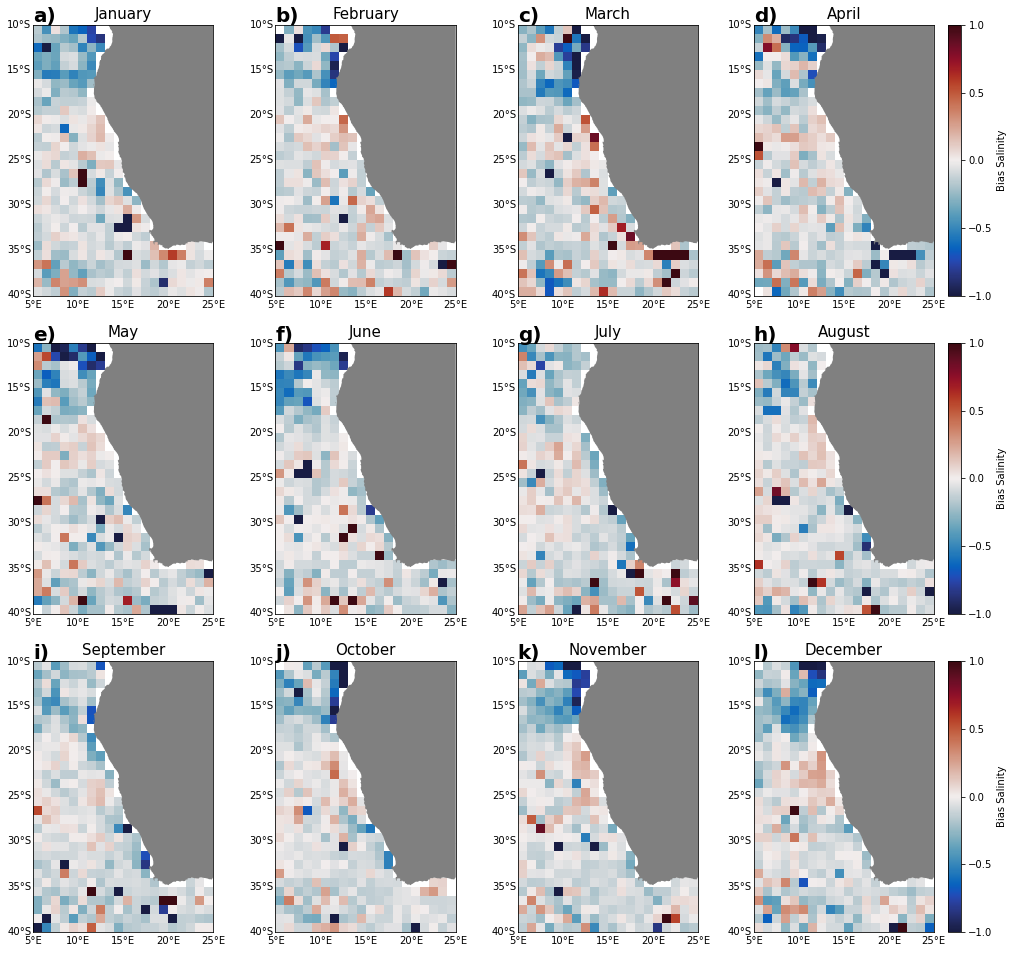

In [207]:
import string
x1= np.arange(5+0.5, 25+0.5,1);y1= list(np.arange(-40+0.5,-10+0.5,1));y1=y1[::-1];y1= np.array(y1);
ticks= np.array([-1,-0.5,0,0.5,1]) #labels para el colorbar
MODELOS=[SST_jan,SST_feb,SST_mar,SST_abr,SST_may,SST_jun,SST_jul,SST_ago,SST_sep,SST_oct,SST_nov, SST_dic]
ARGO=[np.mean(datos_jan[0:2,:,:], axis=0),np.mean(datos_feb[0:2,:,:], axis=0),np.mean(datos_mar[0:2,:,:], axis=0),
      np.mean(datos_abr[0:2,:,:], axis=0),np.mean(datos_may[0:2,:,:], axis=0),np.mean(datos_jun[0:2,:,:], axis=0),
      np.mean(datos_jul[0:2,:,:], axis=0),np.mean(datos_ago[0:2,:,:], axis=0),np.mean(datos_sep[0:2,:,:], axis=0),
      np.mean(datos_oct[0:2,:,:], axis=0),np.mean(datos_nov[0:2,:,:], axis=0),np.mean(datos_dic[0:2,:,:], axis=0)]
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  #cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-1, vmax=1)
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,latlon=True,vmin=-1, vmax=1)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-9,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias Salinity', rotation=90)